In [233]:
import sys
print(sys.executable)

/Users/satyam/.pyenv/versions/3.9.19/bin/python


In [234]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib as ta
import matplotlib.pyplot as plt

In [235]:
ticker_list = ['ASPN', 'BILI', 'COMP', 'POWL', 'SCHD']

In [236]:
tickers=yf.Tickers(ticker_list)

In [237]:
fiveyr_history= yf.download(ticker_list, period='5y', interval='1d', actions=True)

[*********************100%***********************]  5 of 5 completed


<Axes: xlabel='Date'>

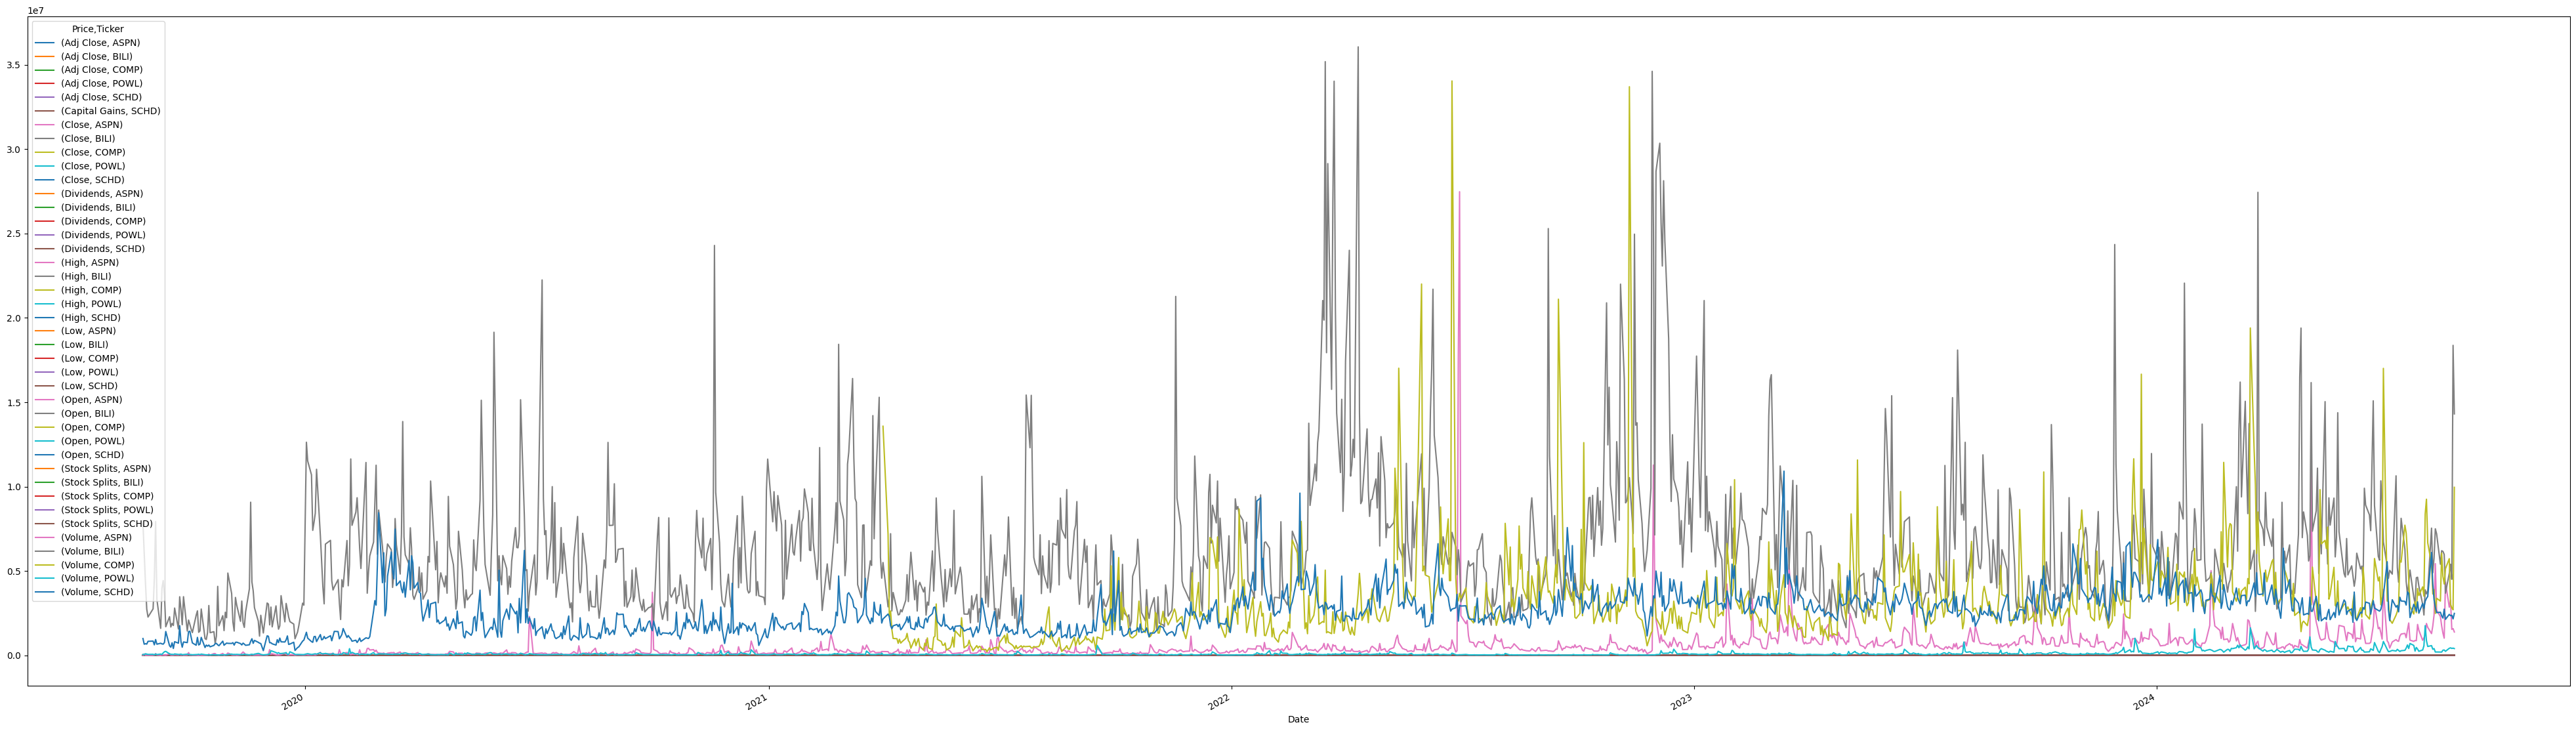

In [239]:
fiveyr_history.plot(figsize = (50, 15))

# Technical Indicators

1. Moving Averages (SMA, EMA): Compute 50-day and 200-day SMAs and EMAs.
2. Relative Strength Index (RSI): Calculate the 14-day RSI.
3. Bollinger Bands: Compute the 20-day Bollinger Bands.
4. MACD (Moving Average Convergence Divergence): Calculate the MACD line and signal line.
5. ATR (Average True Range): Compute the 14-day ATR to assess market volatility.

In [240]:
columns = pd.MultiIndex.from_product([['Close', 'SMA_50', 'SMA_200', 'EMA_50', 'EMA_200','RSI','upper_band','middle_band','lower_band','MACD','MACD_Signal', 'MACD_Histogram', 'ATR'], ticker_list])
ti = pd.DataFrame(index=fiveyr_history.index, columns=columns)

In [241]:
for ticker in ticker_list:
    ti['Close', ticker] = fiveyr_history['Close'][ticker]
    ti['SMA_50', ticker]=ta.SMA(fiveyr_history['Close'][ticker],50)
    ti['SMA_200', ticker]=ta.SMA(fiveyr_history['Close'][ticker],200)
    ti['EMA_50', ticker]=ta.EMA(fiveyr_history['Close'][ticker],50)
    ti['EMA_200', ticker]=ta.EMA(fiveyr_history['Close'][ticker],200)
    ti['RSI', ticker]=ta.RSI(fiveyr_history['Close'][ticker], 14)
    ti['upper_band', ticker], ti['middle_band', ticker], ti['lower_band', ticker] =  ta.BBANDS(fiveyr_history['Close'][ticker], 20)
    ti['MACD', ticker], ti['MACD_Signal',ticker],ti['MACD_Histogram', ticker]=ta.MACD(fiveyr_history['Close'][ticker], fastperiod=50, slowperiod=200, signalperiod=150)
    ti['ATR', ticker]= ta.ATR(fiveyr_history['High'][ticker], fiveyr_history['Low'][ticker], fiveyr_history['Close'][ticker], timeperiod=14)
ti

Close                                      \
                                ASPN   BILI  COMP        POWL       SCHD   
Date                                                                       
2019-08-26 00:00:00+00:00   6.230000  14.50   NaN   35.900002  52.209999   
2019-08-27 00:00:00+00:00   6.030000  13.92   NaN   35.490002  52.049999   
2019-08-28 00:00:00+00:00   6.140000  13.53   NaN   36.180000  52.599998   
2019-08-29 00:00:00+00:00   6.200000  13.70   NaN   36.650002  53.130001   
2019-08-30 00:00:00+00:00   6.040000  14.05   NaN   36.320000  53.250000   
...                              ...    ...   ...         ...        ...   
2024-08-19 00:00:00+00:00  31.719999  14.31  4.89  171.039993  82.440002   
2024-08-20 00:00:00+00:00  30.700001  13.95  4.77  173.449997  82.220001   
2024-08-21 00:00:00+00:00  30.980000  14.02  4.74  173.949997  82.570000   
2024-08-22 00:00:00+00:00  29.230000  12.96  4.69  178.020004  82.339996   
2024-08-23 00:00:00+00:00  30.139999  14.94  5.13  192.779999  83.519997   

                            SMA_50                                        ...  \
                              ASPN     BILI    COMP        POWL     SCHD  ...   
Date                                                                      ...   
2019-08-26 00:00:00+00:00      NaN      NaN     NaN         NaN      NaN  ...   
2019-08-27 00:00:00+00:00      NaN      NaN     NaN         NaN      NaN  ...   
2019-08-28 00:00:00+00:00      NaN      NaN     NaN         NaN      NaN  ...   
2019-08-29 00:00:00+00:00      NaN      NaN     NaN         NaN      NaN  ...   
2019-08-30 00:00:00+00:00      NaN      NaN     NaN         NaN      NaN  ...   
...                            ...      ...     ...         ...      ...  ...   
2024-08-19 00:00:00+00:00  24.6928  15.3994  4.0472  152.160399  79.4518  ...   
2024-08-20 00:00:00+00:00  24.7026  15.3990  4.0706  152.448799  79.5384  ...   
2024-08-21 00:00:00+00:00  24.6952  15.3954  4.0948  152.510799  79.6344  ...   
2024-08-22 00:00:00+00:00  24.6952  15.3756  4.1158  152.778799  79.7312  ...   
2024-08-23 00:00:00+00:00  24.6892  15.3866  4.1396  153.171400  79.8528  ...   

                          MACD_Histogram                                \
                                    ASPN      BILI      COMP      POWL   
Date                                                                     
2019-08-26 00:00:00+00:00            NaN       NaN       NaN       NaN   
2019-08-27 00:00:00+00:00            NaN       NaN       NaN       NaN   
2019-08-28 00:00:00+00:00            NaN       NaN       NaN       NaN   
2019-08-29 00:00:00+00:00            NaN       NaN       NaN       NaN   
2019-08-30 00:00:00+00:00            NaN       NaN       NaN       NaN   
...                                  ...       ...       ...       ...   
2024-08-19 00:00:00+00:00       0.133494  1.402620  0.318670 -6.297525   
2024-08-20 00:00:00+00:00       0.287157  1.351855  0.327275 -5.874485   
2024-08-21 00:00:00+00:00       0.437543  1.305121  0.334091 -5.467362   
2024-08-22 00:00:00+00:00       0.526074  1.229581  0.338642 -4.972477   
2024-08-23 00:00:00+00:00       0.633268  1.214864  0.355209 -4.086997   

                                          ATR                                 \
                               SCHD      ASPN      BILI      COMP       POWL   
Date                                                                           
2019-08-26 00:00:00+00:00       NaN       NaN       NaN       NaN        NaN   
2019-08-27 00:00:00+00:00       NaN       NaN       NaN       NaN        NaN   
2019-08-28 00:00:00+00:00       NaN       NaN       NaN       NaN        NaN   
2019-08-29 00:00:00+00:00       NaN       NaN       NaN       NaN        NaN   
2019-08-30 00:00:00+00:00       NaN       NaN       NaN       NaN        NaN   
...                             ...       ...       ...       ...        ...   
2024-08-19 00:00:00+00:00  0.667188  1.968309  0.683895  0.265284  10.8697

# Strategies

In [242]:
columns = pd.MultiIndex.from_product([['SMA_buy', 'SMA_sell', 'RSI_buy', 'RSI_sell', 'bb_buy', 'bb_sell', 'MACD_buy', 'MACD_sell'], ticker_list])
signals = pd.DataFrame(index=ti.index, columns=columns)

In [243]:
columns = pd.MultiIndex.from_product([['Open', 'Close', 'Returns', 'SMA_positions', 'RSI_positions', 'bb_positions' ,'MACD_positions'], ticker_list])
positions = pd.DataFrame(index=ti.index, columns=columns)
positions['Close'] = fiveyr_history['Close']
positions['Open'] = fiveyr_history['Open']
positions['Returns'] = fiveyr_history['Close'].pct_change()

In [244]:
columns = pd.MultiIndex.from_product([['SMA_returns', 'RSI_returns', 'bb_returns' ,'MACD_returns'], ticker_list])
returns = pd.DataFrame(index=range(1), columns=columns)
returns

SMA_returns                     RSI_returns                     bb_returns  \
         ASPN BILI COMP POWL SCHD        ASPN BILI COMP POWL SCHD       ASPN   
0         NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN  NaN  NaN        NaN   

                      MACD_returns                      
  BILI COMP POWL SCHD         ASPN BILI COMP POWL SCHD  
0  NaN  NaN  NaN  NaN          NaN  NaN  NaN  NaN  NaN

# SMA Strategy

In [245]:
def str_sma(index, row, position, signals):
    if row['SMA_50'][ticker] > row['SMA_200'][ticker]:
        if not position:
            signals.loc[index, ('SMA_buy', ticker)] = row['Close'][ticker]
            position = True
    elif row['SMA_50'][ticker] < row['SMA_200'][ticker]:
        if position:
            signals.loc[index, ('SMA_sell', ticker)] = row['Close'][ticker]
            position = False
    return position

In [246]:
for ticker in ticker_list:
    # signals['SMA_signal', ticker]=np.where(ti['SMA_50'][ticker] > ti['SMA_200'][ticker], 1.0, 0.0)
    # signals['SMA_position', ticker]=signals['SMA_signal'][ticker].diff()
    position = False
    for index, row in ti.iterrows():
        position = str_sma(index, row, position, signals)
        positions.loc[index, ('SMA_positions', ticker)] = position

In [247]:
def plot_SMA(ticker, ti, signals):
    plt.figure(figsize=(30, 8))

    plt.plot(ti.index, ti['Close', ticker], label=f'Close Price ({ticker})', color='black', alpha=0.6)
    plt.plot(ti.index, ti['SMA_50', ticker], label='SMA 50', color='blue', alpha=0.6)
    plt.plot(ti.index, ti['SMA_200', ticker], label='SMA 200', color='red', alpha=0.6)

    buy_signals = signals['SMA_buy', ticker].dropna()
    plt.scatter(buy_signals.index, buy_signals, label='Buy Signal', marker='^', color='green', alpha=1)

    sell_signals = signals['SMA_sell', ticker].dropna()
    plt.scatter(sell_signals.index, sell_signals, label='Sell Signal', marker='v', color='red', alpha=1)

    plt.title(f"{ticker} - SMA Crossover Strategy with Buy/Sell Signals")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

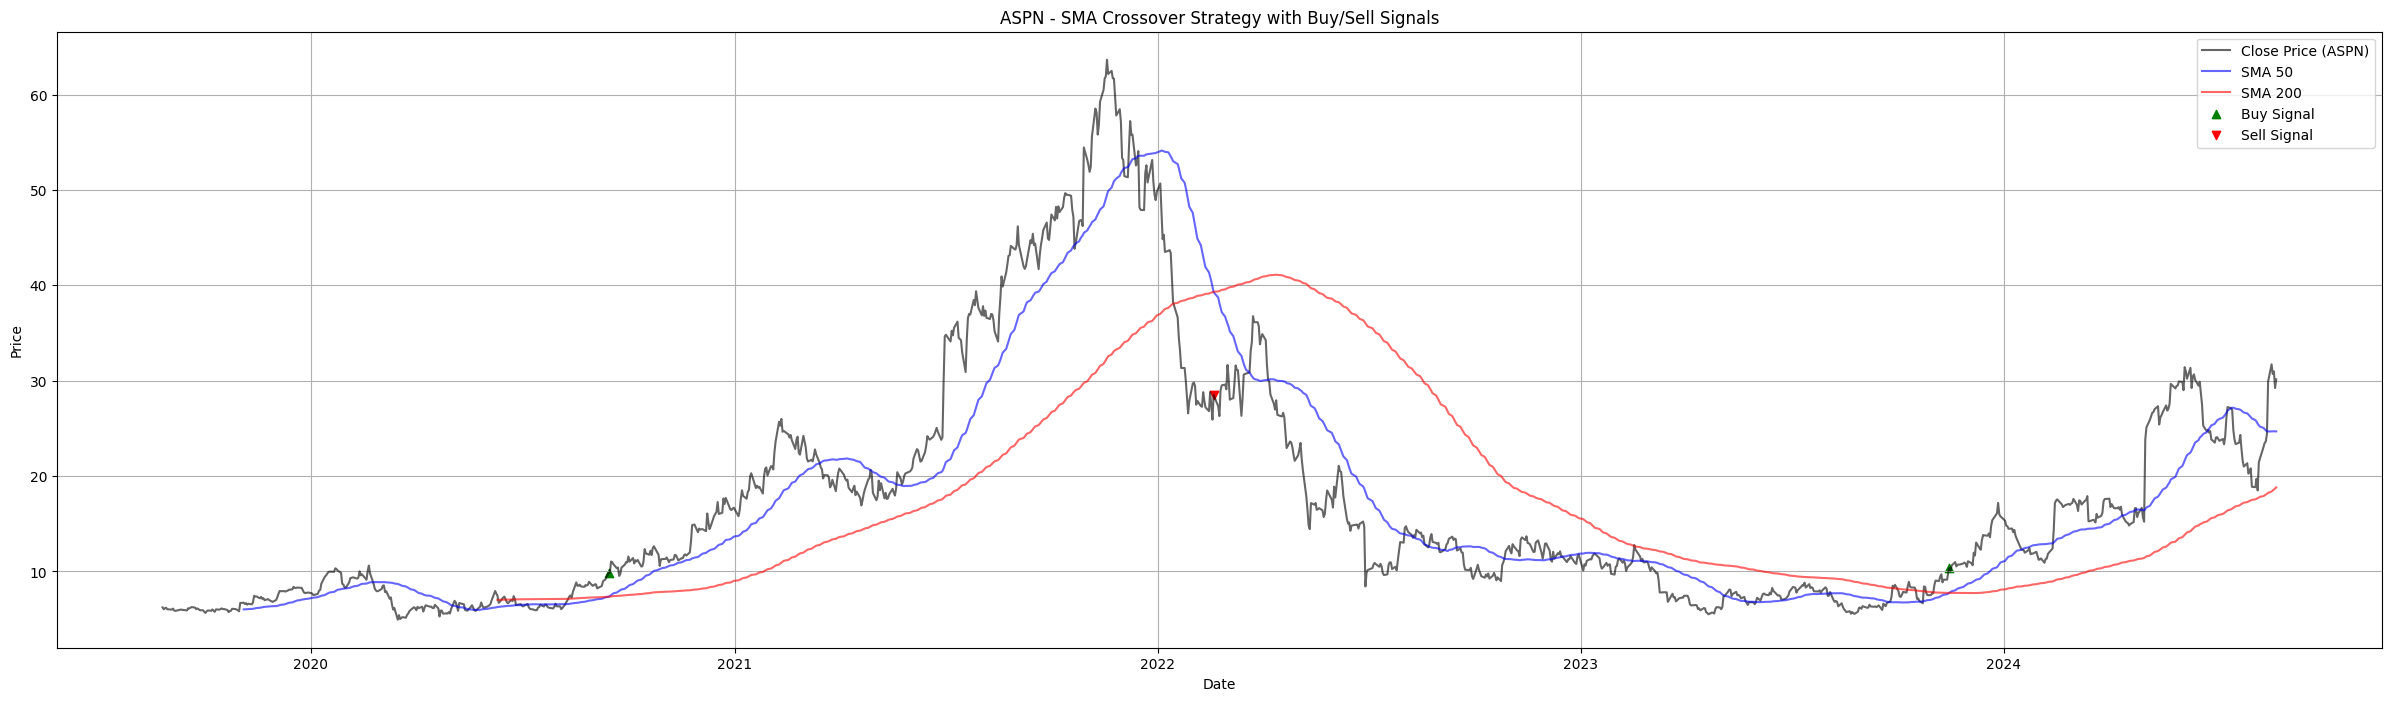

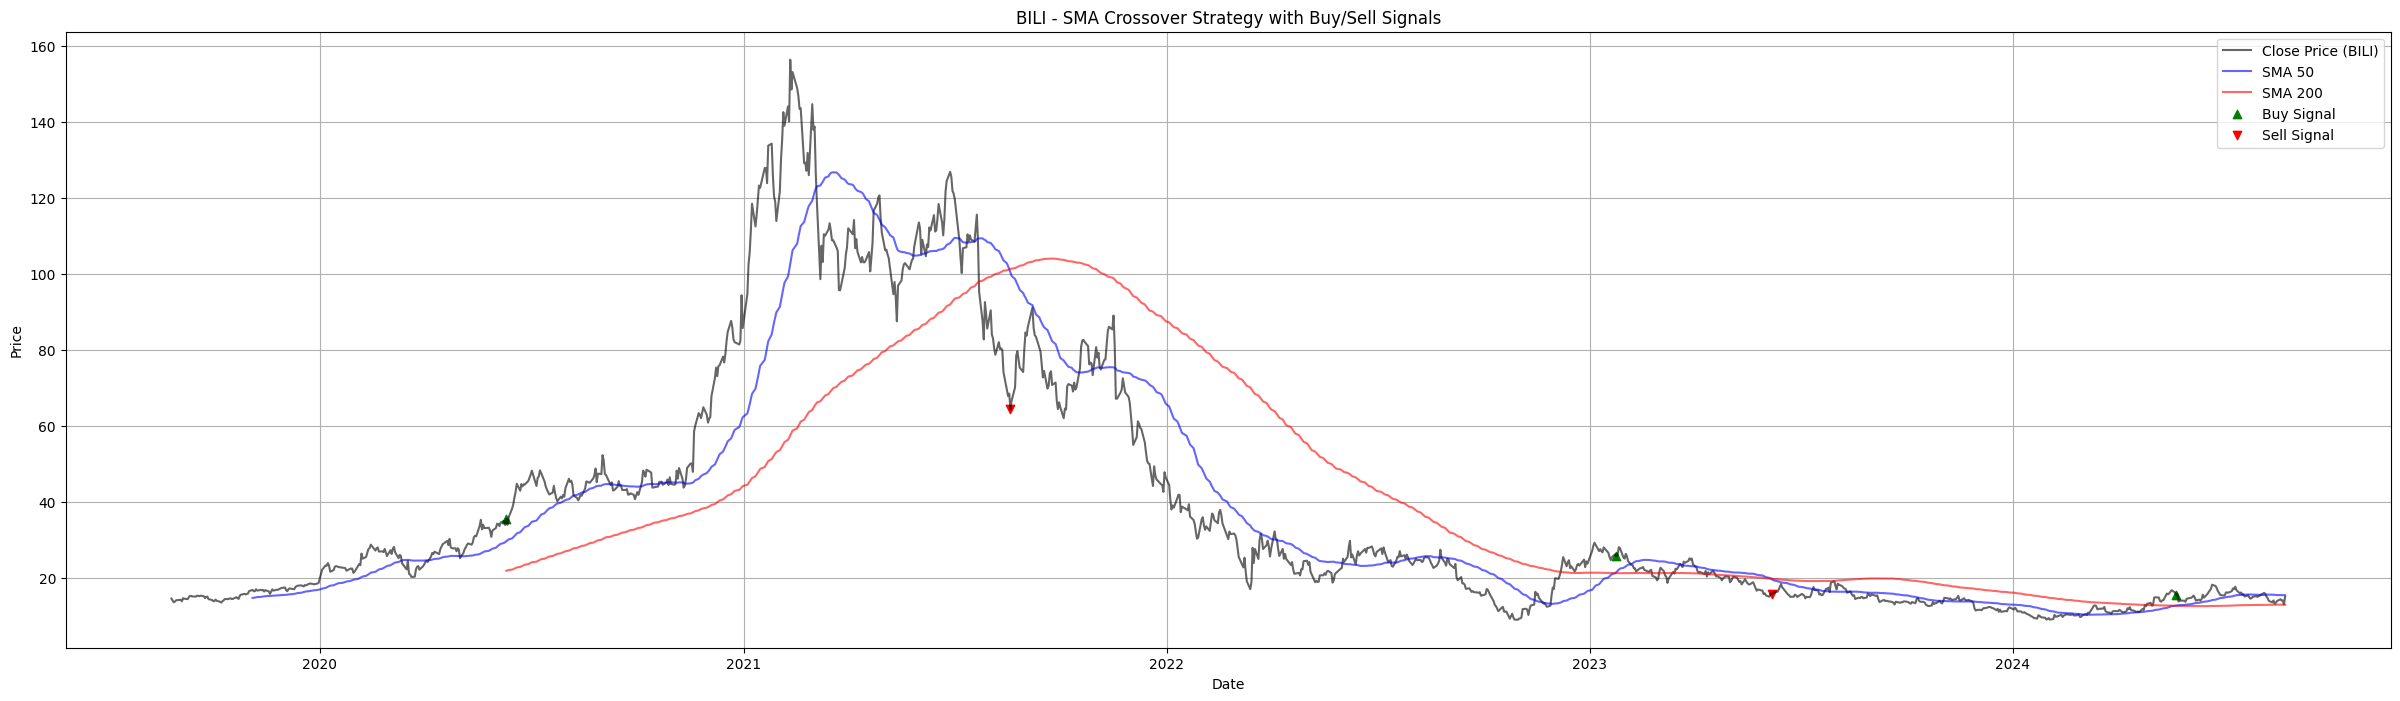

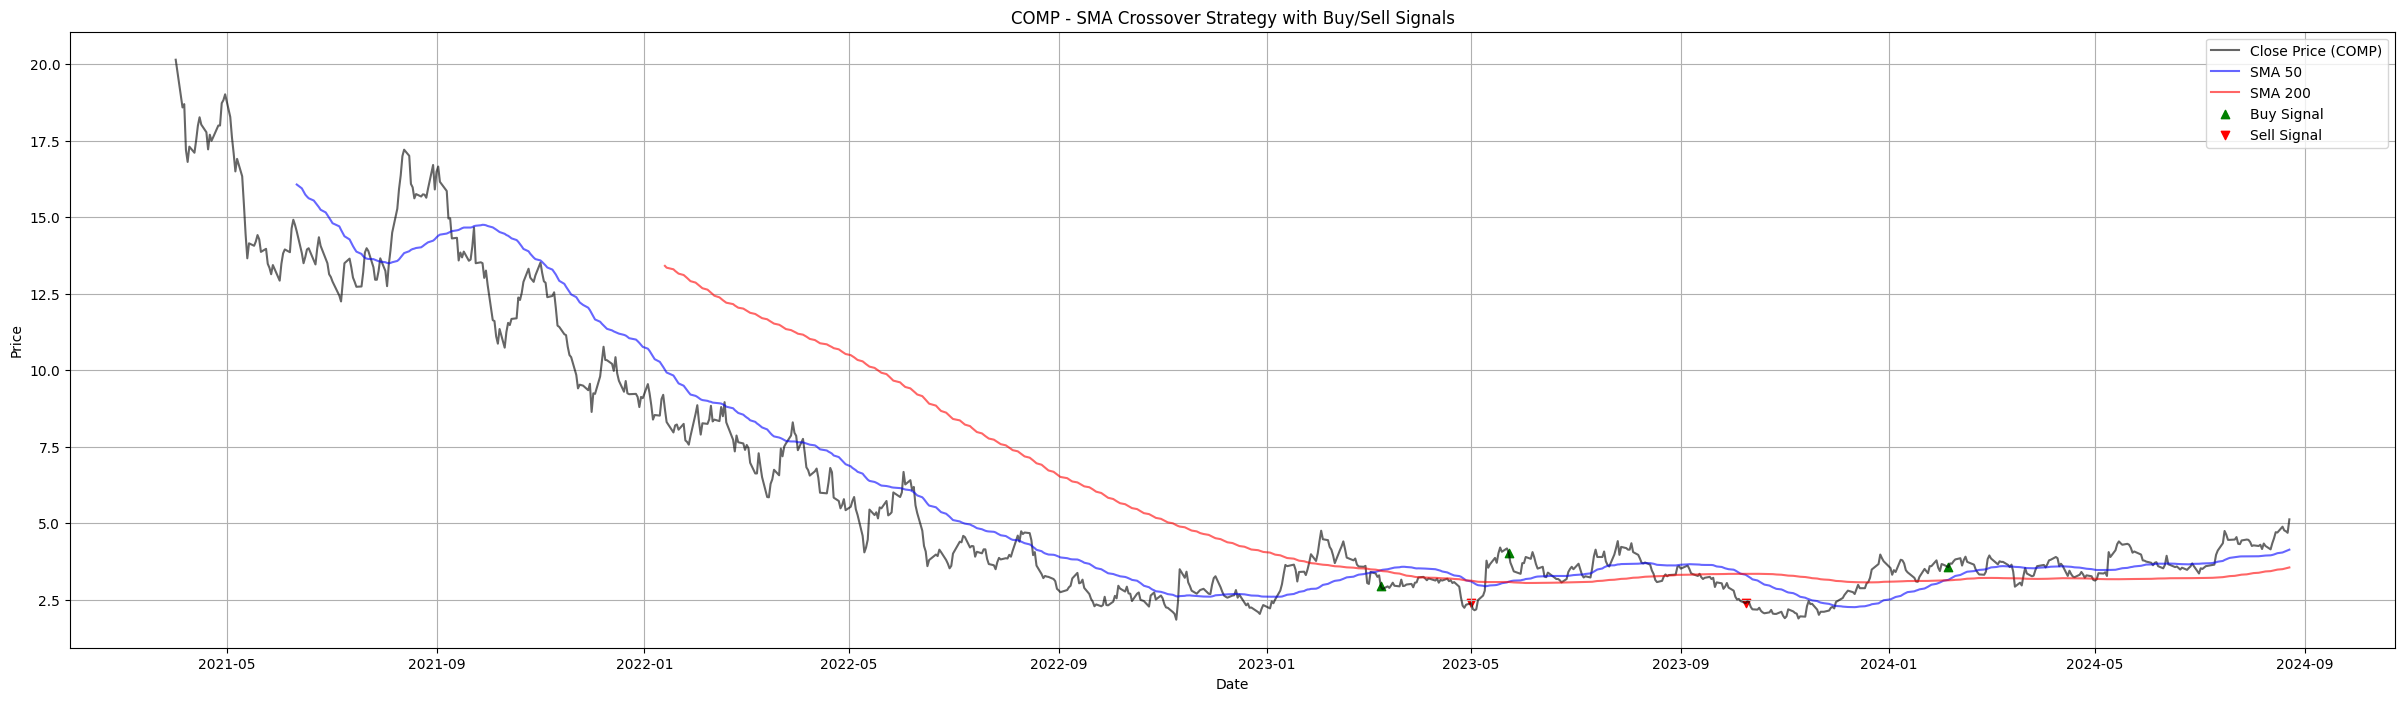

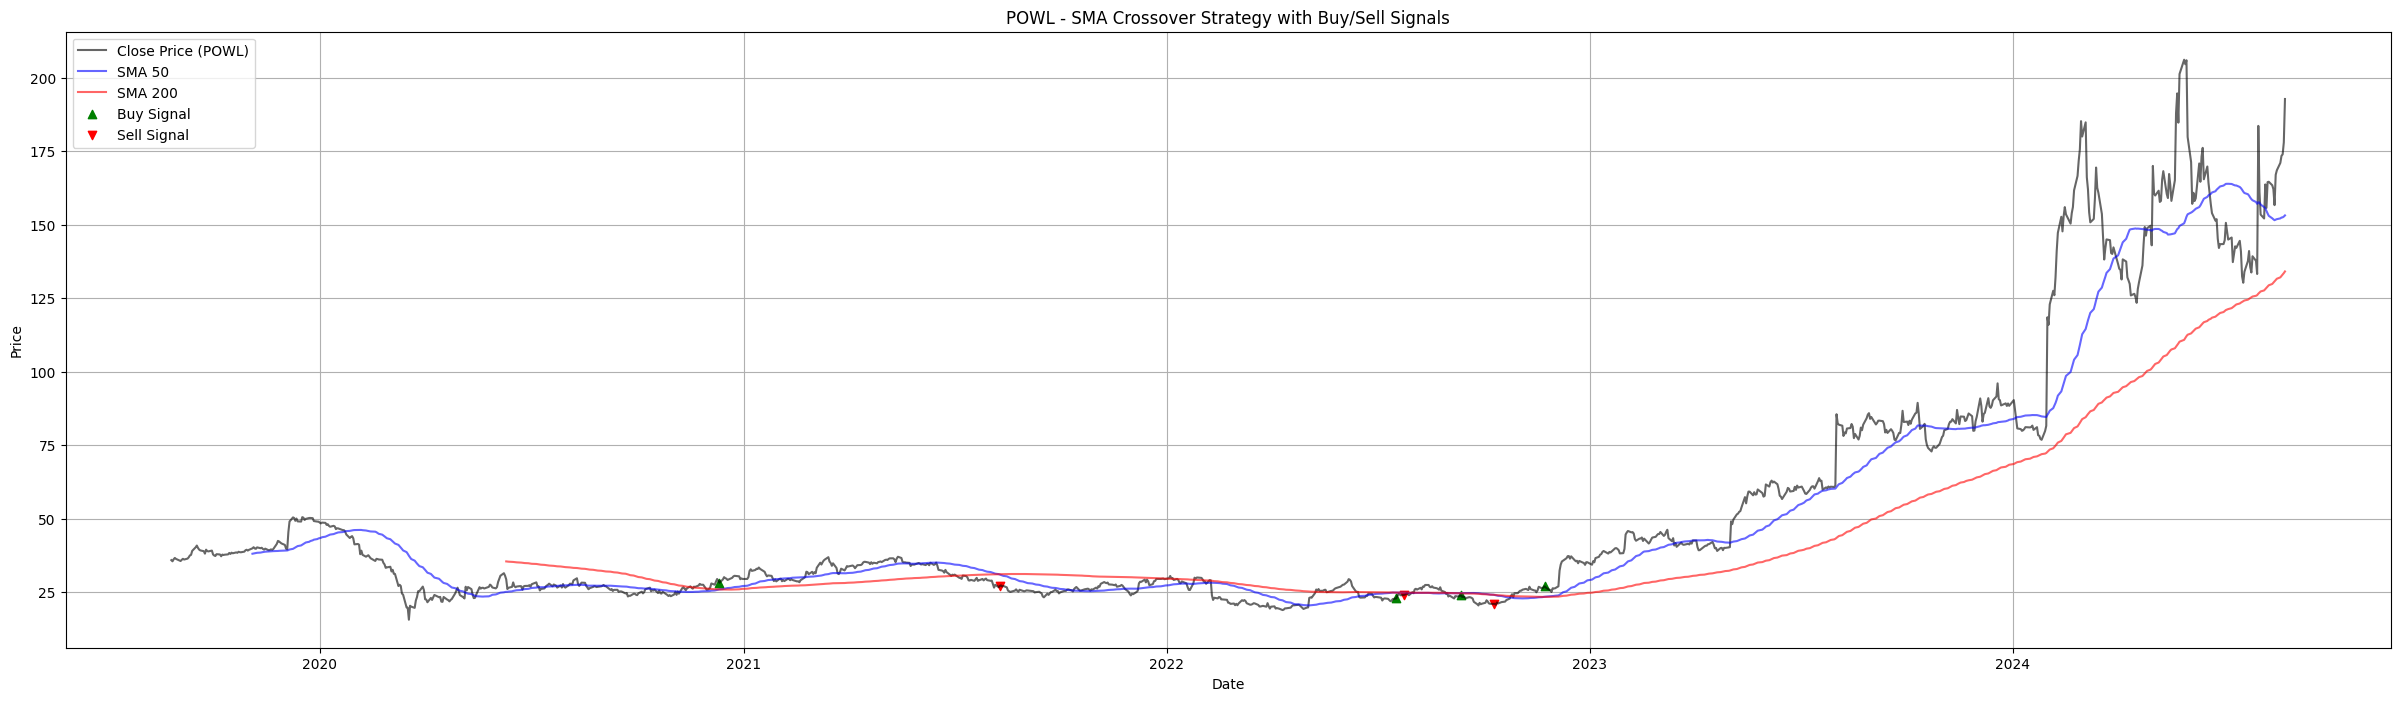

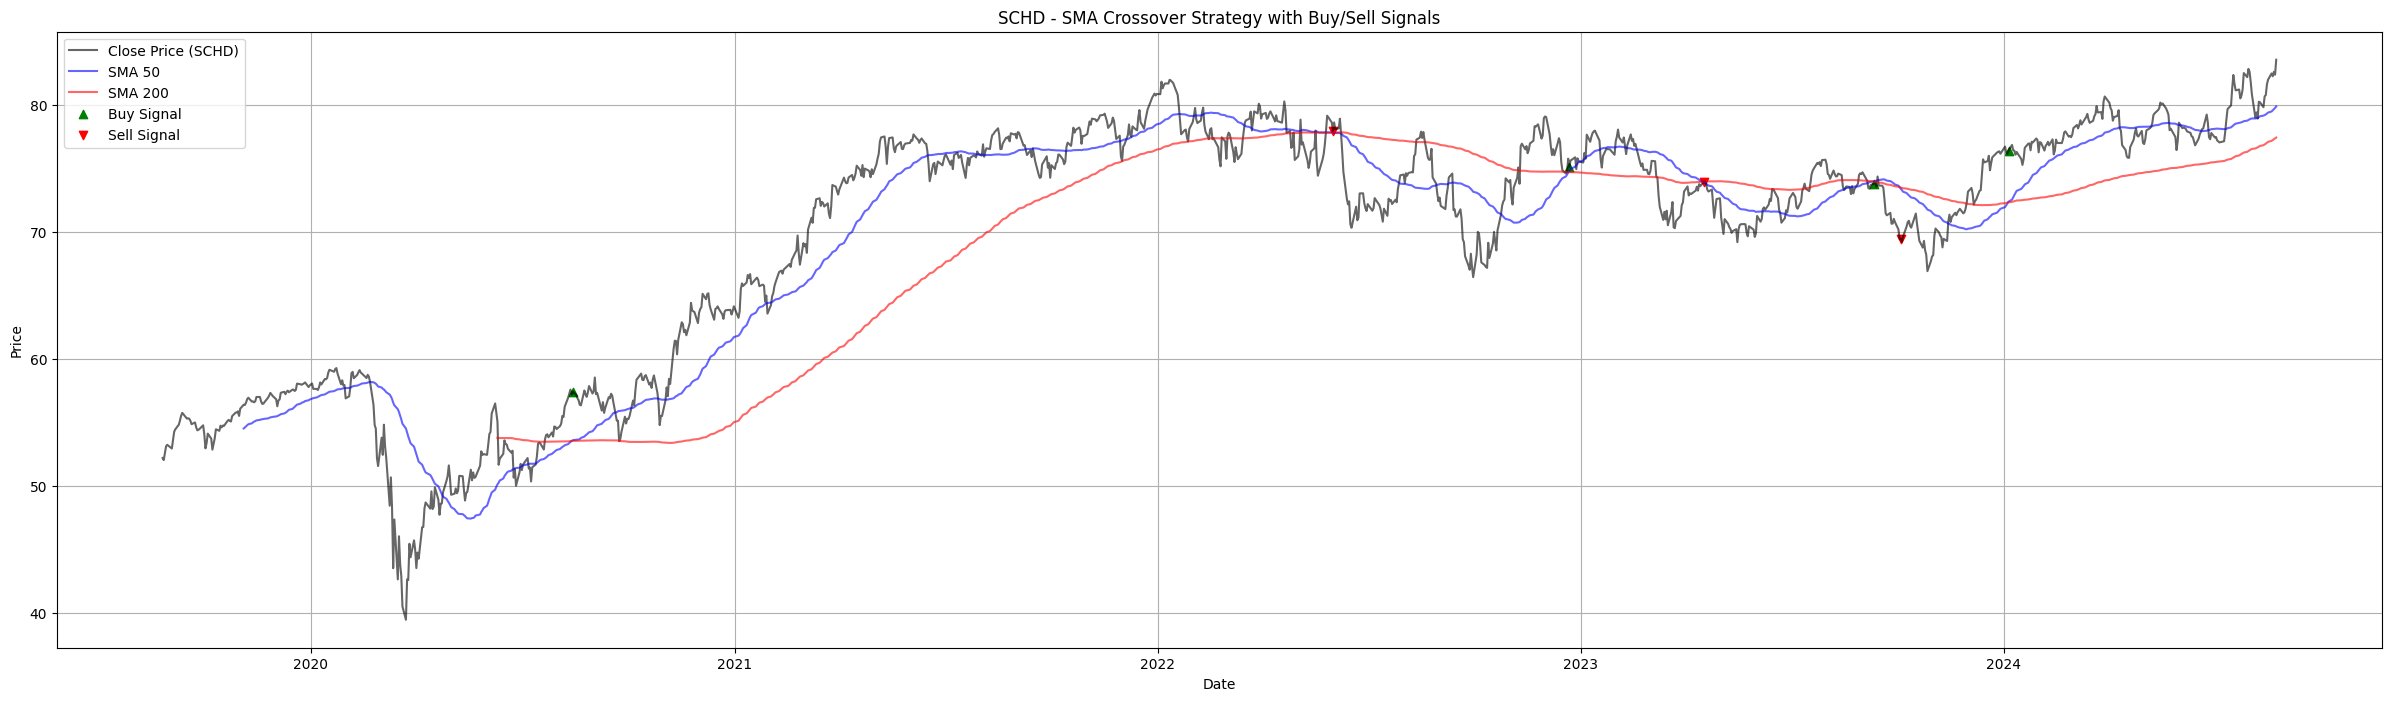

In [248]:
for ticker in ticker_list:
    plot_SMA(ticker, ti, signals)

# RSI Strategy

In [249]:
def str_rsi(index, row, position, signals):
    if row['SMA_50'][ticker] > row['SMA_200'][ticker] and row['RSI'][ticker] < 30:
        if not position:
            signals.loc[index, ('RSI_buy', ticker)] = row['Close'][ticker]
            position = True
    elif row['SMA_50'][ticker] < row['SMA_200'][ticker] and row['RSI'][ticker] > 70:
        if position:
            signals.loc[index, ('RSI_sell', ticker)] = row['Close'][ticker]
            position = False
    return position

In [250]:
for ticker in ticker_list:
    position = False
    for index, row in ti.iterrows():
        position = str_rsi(index, row, position, signals)
        positions.loc[index, ('RSI_positions', ticker)] = position

In [251]:
def plot_RSI(ticker, ti, signals):
    plt.figure(figsize=(30, 8))

    plt.plot(ti.index, ti['Close', ticker], label=f'Close Price ({ticker})', color='black', alpha=0.6)
    plt.plot(ti.index, ti['RSI', ticker], label='RSI', color='blue', alpha=0.6)

    buy_signals = signals['RSI_buy', ticker].dropna()
    plt.scatter(buy_signals.index, buy_signals, label='Buy Signal', marker='^', color='green', alpha=1)

    sell_signals = signals['RSI_sell', ticker].dropna()
    plt.scatter(sell_signals.index, sell_signals, label='Sell Signal', marker='v', color='red', alpha=1)

    plt.title(f"{ticker} - RSI Strategy with Buy/Sell Signals")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

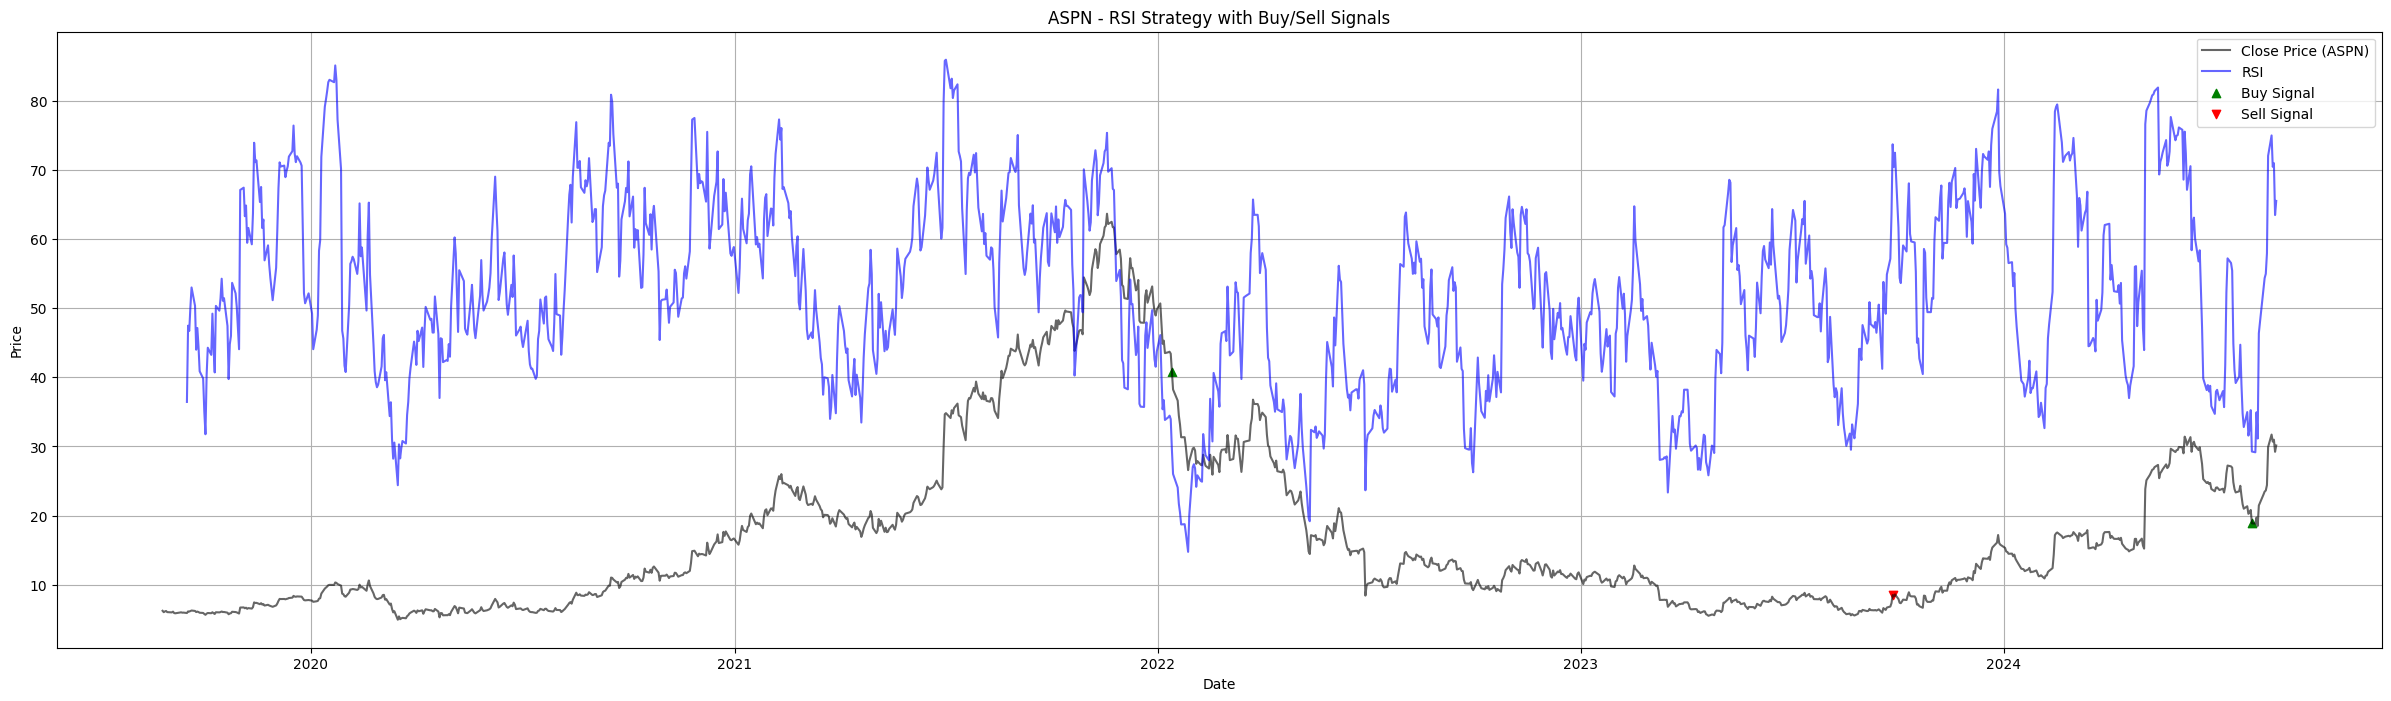

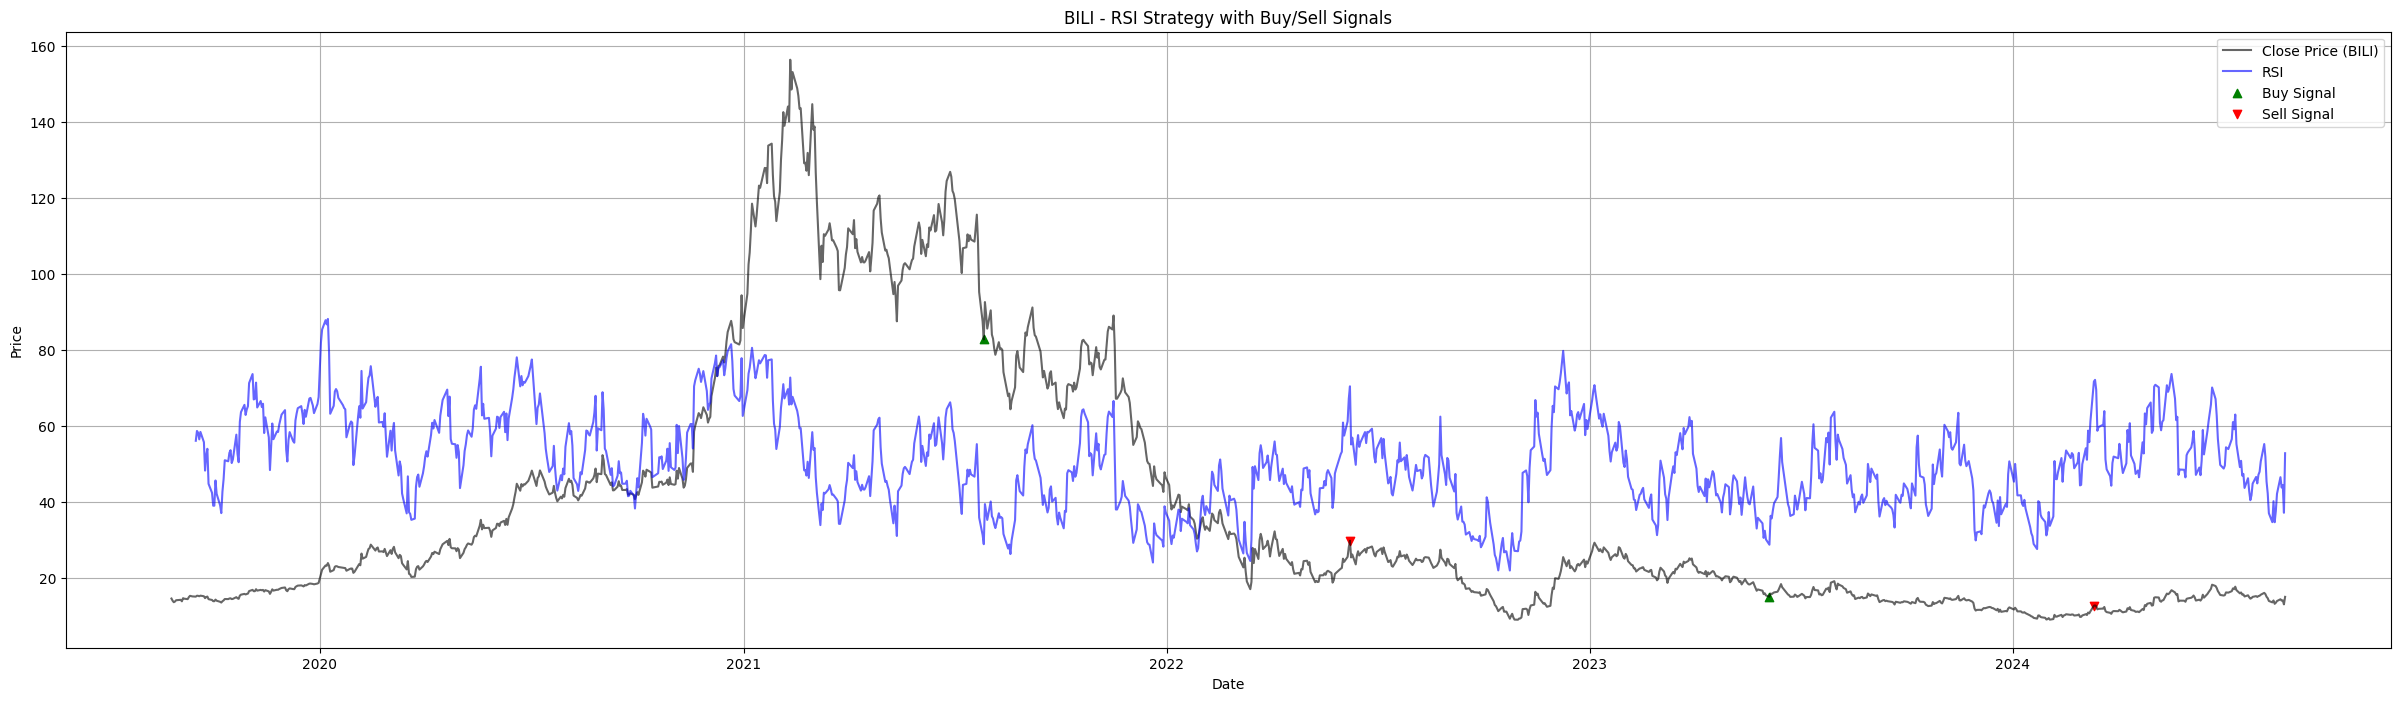

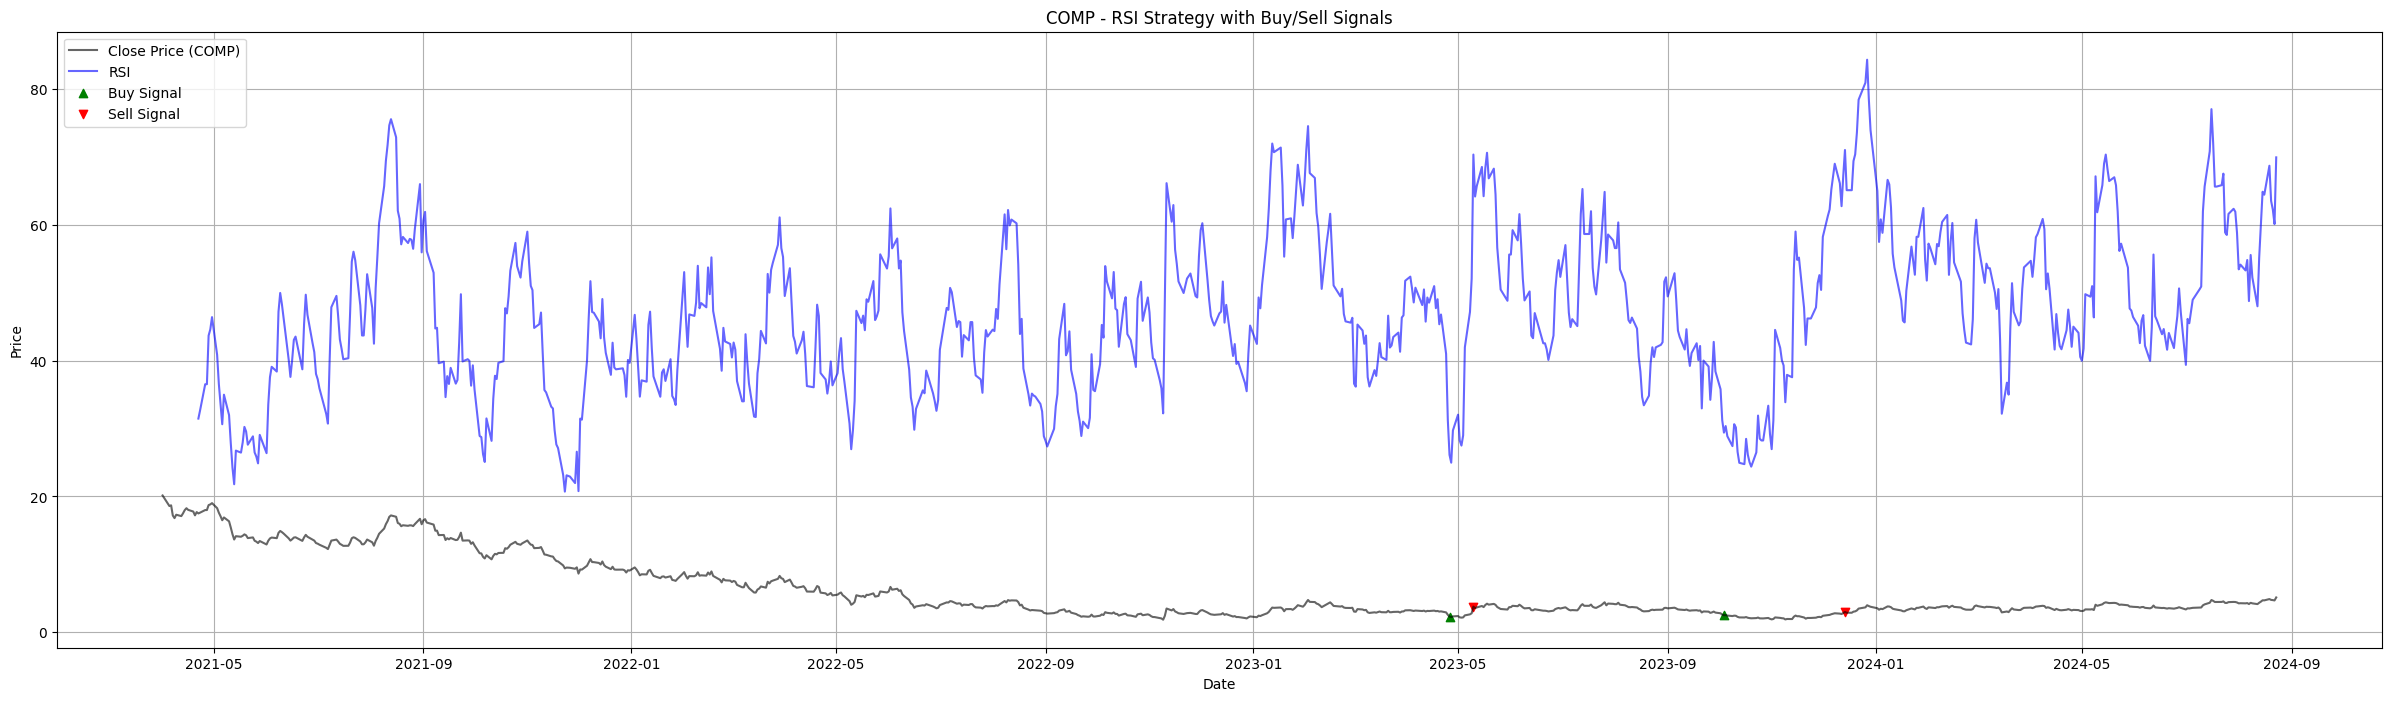

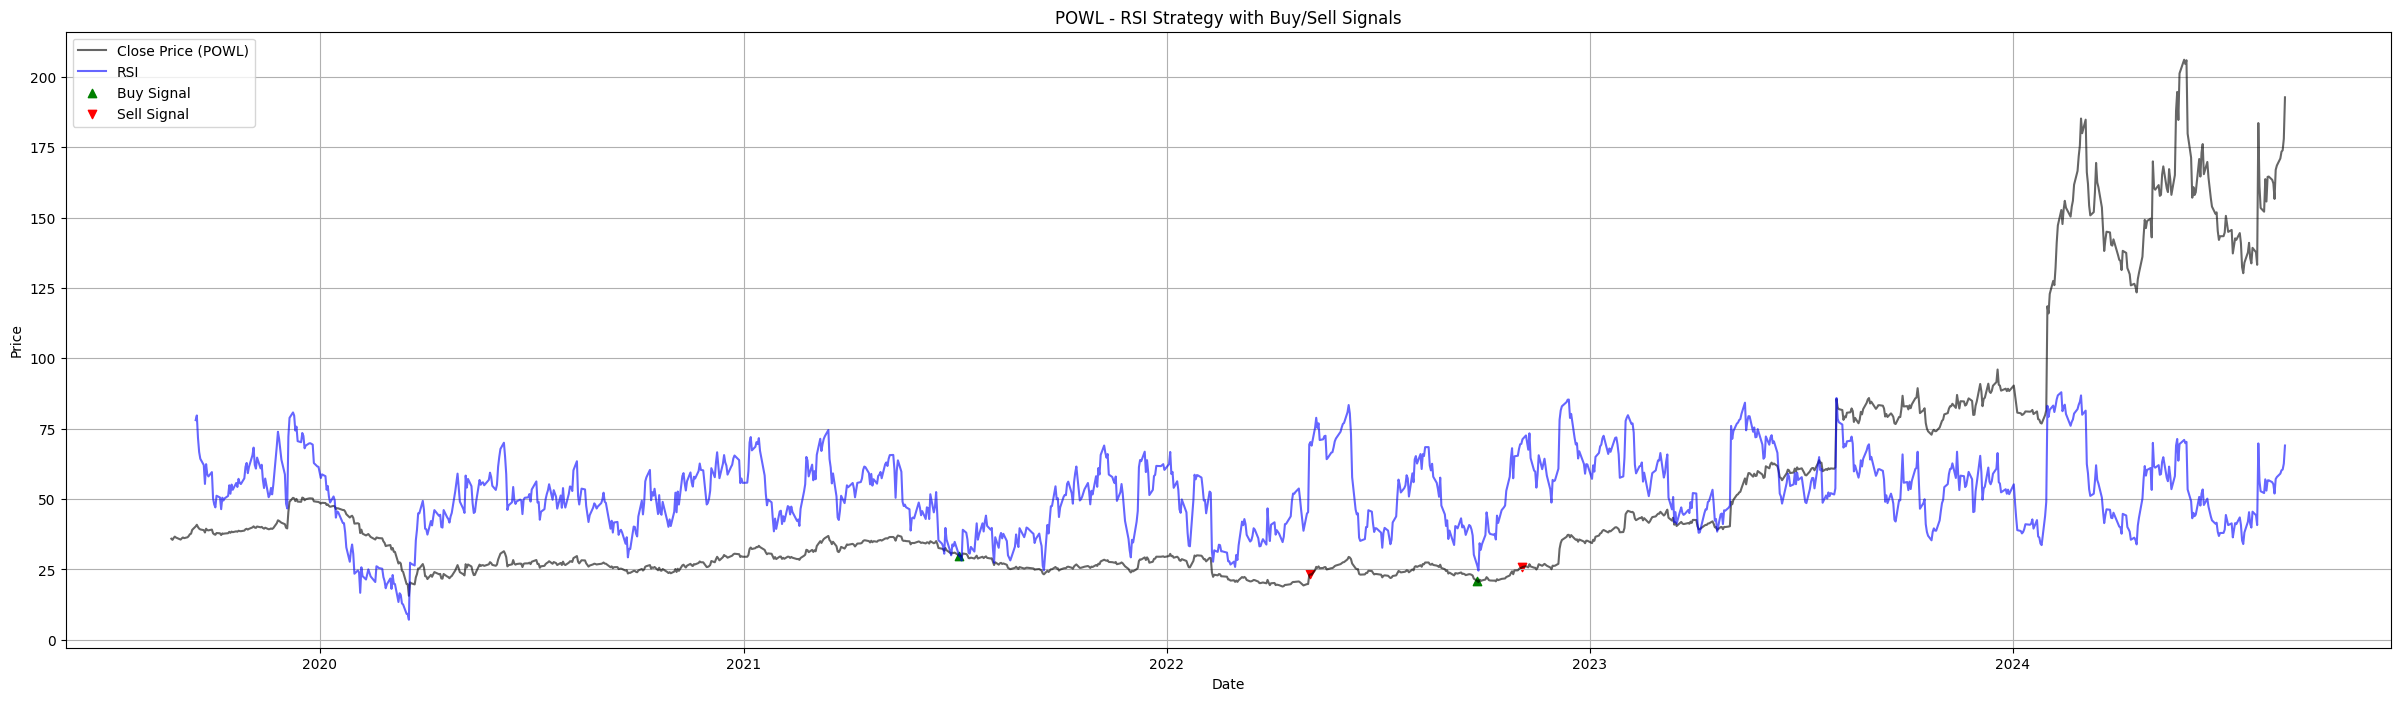

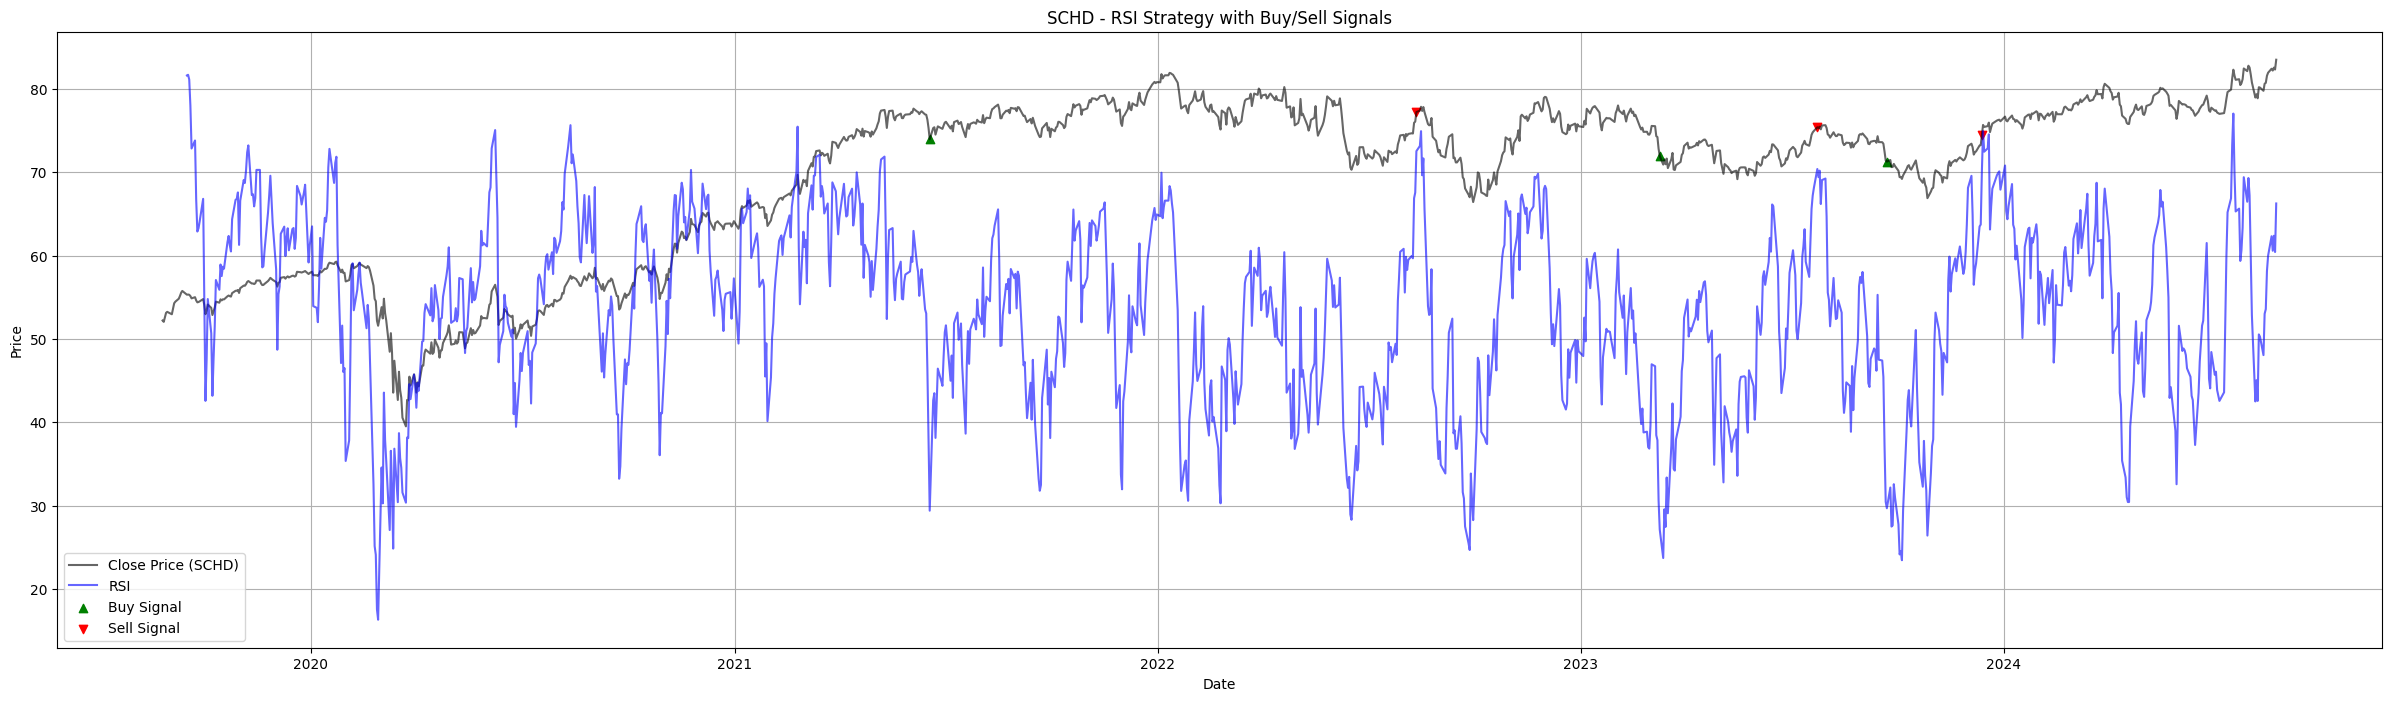

In [252]:
for ticker in ticker_list:
    plot_RSI(ticker, ti, signals)

In [253]:
# for ticker in ticker_list:
#     signals['SMA_Crossover_Buy', ticker] = ((ti['SMA_50'][ticker] > ti['SMA_200'][ticker]) & (ti['SMA_50'][ticker].shift(1) <= ti['SMA_200'][ticker].shift(1))).to_numpy()
#     signals['SMA_Crossover_Sell', ticker] = ((ti['SMA_50'][ticker] < ti['SMA_200'][ticker]) & (ti['SMA_50'][ticker].shift(1) >= ti['SMA_200'][ticker].shift(1))).to_numpy()
# 
#     signals['RSI_Buy', ticker] = (ti['RSI'][ticker] < 30).to_numpy()
#     signals['RSI_Sell', ticker] = (ti['RSI'][ticker] > 70).to_numpy()
# 
#     signals['Bollinger_Buy', ticker] = (fiveyr_history['Close'][ticker] < ti['lower_band'][ticker]).to_numpy()
#     signals['Bollinger_Sell', ticker] = (fiveyr_history['Close'][ticker] > ti['upper_band'][ticker]).to_numpy()
# 
#     signals['Buy', ticker] = (signals['SMA_Crossover_Buy'] & signals['RSI_Buy'] & signals['Bollinger_Buy']).to_numpy()
#     signals['Sell', ticker] = (signals['SMA_Crossover_Sell'] & signals['RSI_Sell'] & signals['Bollinger_Sell']).to_numpy()
#     # 1 for Buy, -1 for Sell, 0 for No Signal
#     ti['Signals', ticker] = (signals['Buy'][ticker].astype(int) - signals['Sell'][ticker].astype(int)).to_numpy()

In [254]:
# def buy_sell(data, ticker):
#     signalBuy = []
#     signalSell = []
#     position = False 
# 
#     for i in range(len(data)):
#         if data['SMA_50'][ticker][i] > data['SMA_200'][ticker][i]:
#             if not position:
#                 signalBuy.append(data['Close'][ticker][i])
#                 signalSell.append(np.nan)
#                 position = True
#             else:
#                 signalBuy.append(np.nan)
#                 signalSell.append(np.nan)
#         elif data['SMA_50'][ticker][i] < data['SMA_200'][ticker][i]:
#             if position:
#                 signalBuy.append(np.nan)
#                 signalSell.append(data['Close'][ticker][i])
#                 position = False
#             else:
#                 signalBuy.append(np.nan)
#                 signalSell.append(np.nan)
#         else:
#             signalBuy.append(np.nan)
#             signalSell.append(np.nan)
#     return pd.Series([signalBuy, signalSell])

In [255]:
# for ticker in ticker_list:
#     signals['SMA_buy', ticker], signals['SMA_sell', ticker] = buy_sell(ti, ticker)

# BB Strategy

In [256]:
def str_bb(index, row, position, ticker, ti, signals):
    if row['Close'][ticker] < row['lower_band'][ticker]:
        if not position:
            signals.loc[index, ('bb_buy', ticker)] = row['Close'][ticker]
            position = True
    elif row['Close'][ticker] > row['upper_band'][ticker]:
        if position:
            signals.loc[index, ('bb_sell', ticker)] = row['Close'][ticker]
            position = False
    return position

In [257]:
for ticker in ticker_list:
    position = False
    for index, row in ti.iterrows():
        position = str_bb(index, row, position, ticker, ti, signals)
        positions.loc[index, ('bb_positions', ticker)] = position

In [258]:
def plot_bb(ticker, ti, signals):
    plt.figure(figsize=(30, 8))

    plt.plot(ti.index, ti['Close', ticker], label=f'Close Price ({ticker})', color='black', alpha=0.6)
    plt.plot(ti.index, ti['upper_band', ticker], label='Upper Band', color='blue', alpha=0.6)
    plt.plot(ti.index, ti['middle_band', ticker], label='Middle Band', color='red', alpha=0.6)
    plt.plot(ti.index, ti['lower_band', ticker], label='Lower Band', color='green', alpha=0.6)

    buy_signals = signals['bb_buy', ticker].dropna()
    plt.scatter(buy_signals.index, buy_signals, label='Buy Signal', marker='^', color='green', alpha=1)

    sell_signals = signals['bb_sell', ticker].dropna()
    plt.scatter(sell_signals.index, sell_signals, label='Sell Signal', marker='v', color='red', alpha=1)

    plt.title(f"{ticker} - BB Strategy with Buy/Sell Signals")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

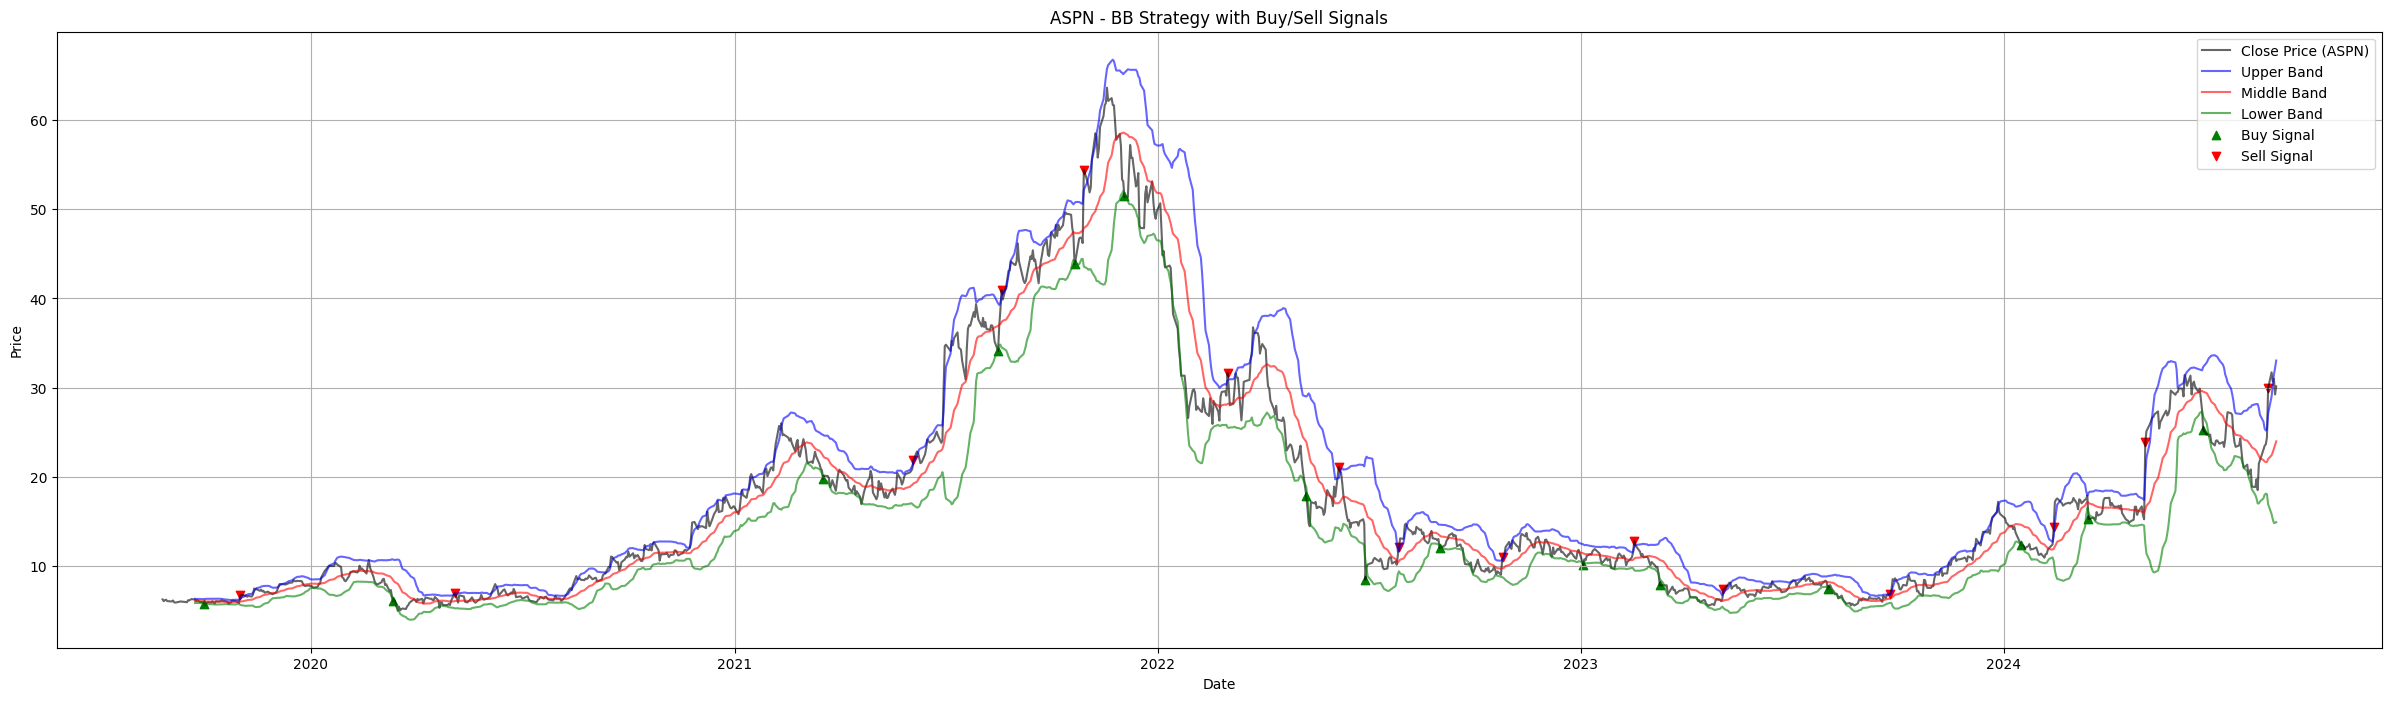

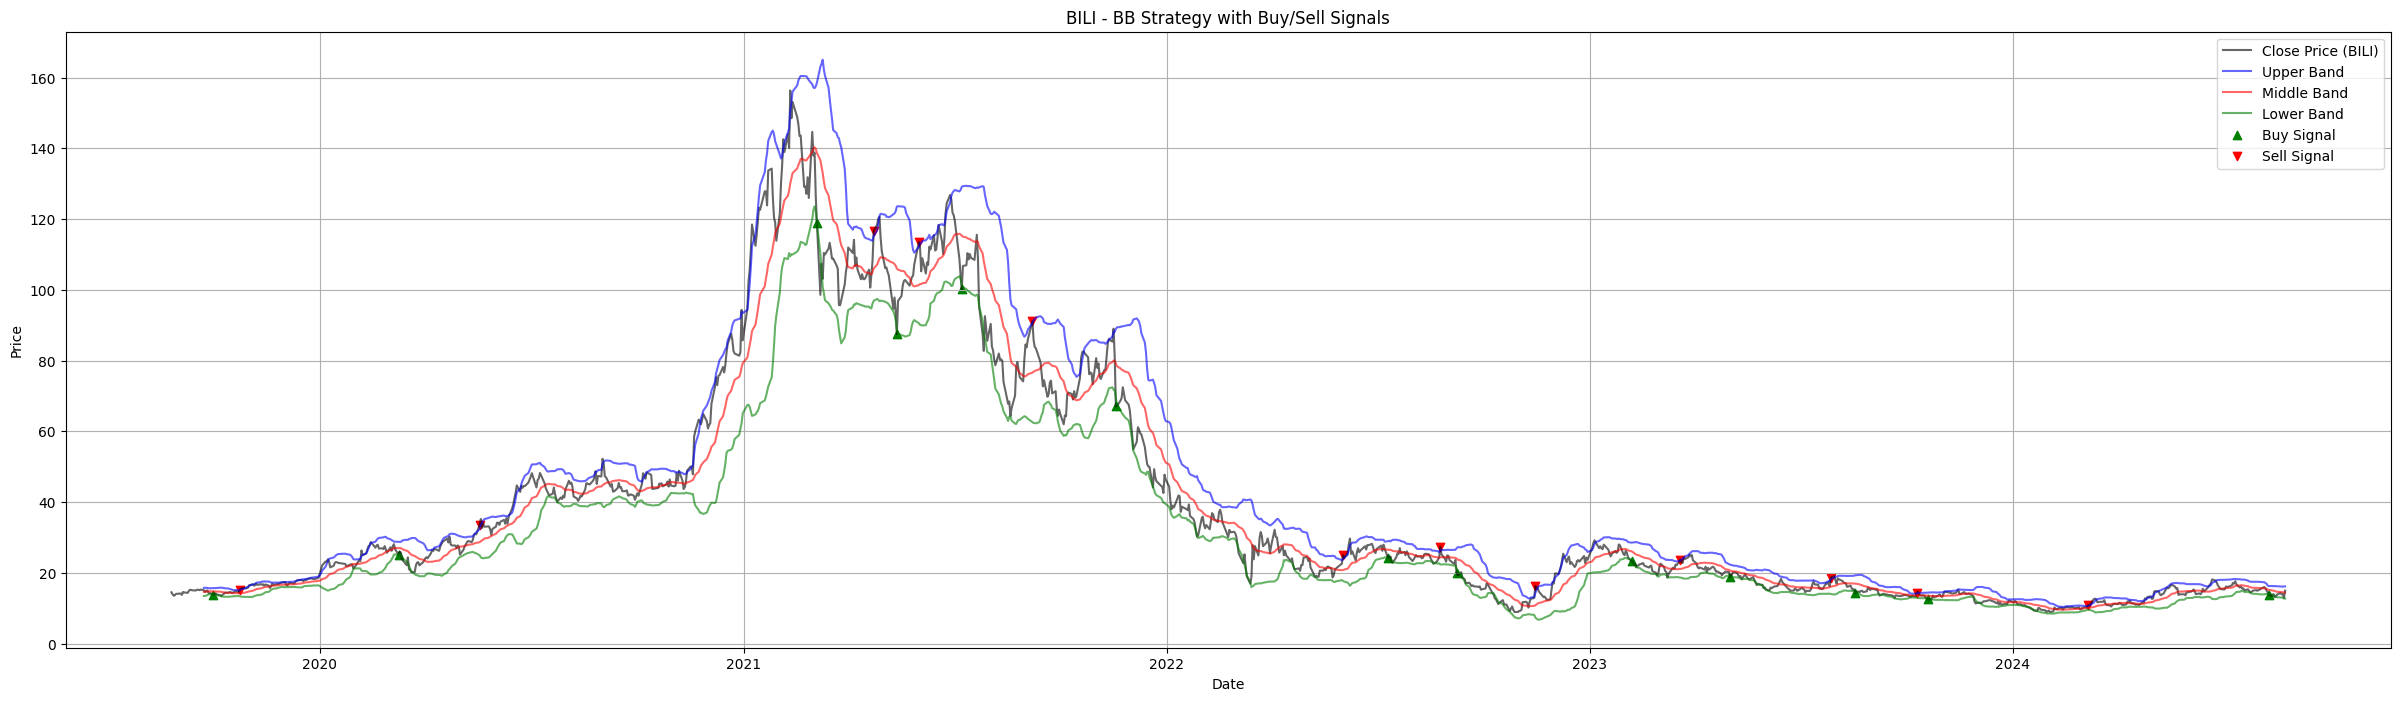

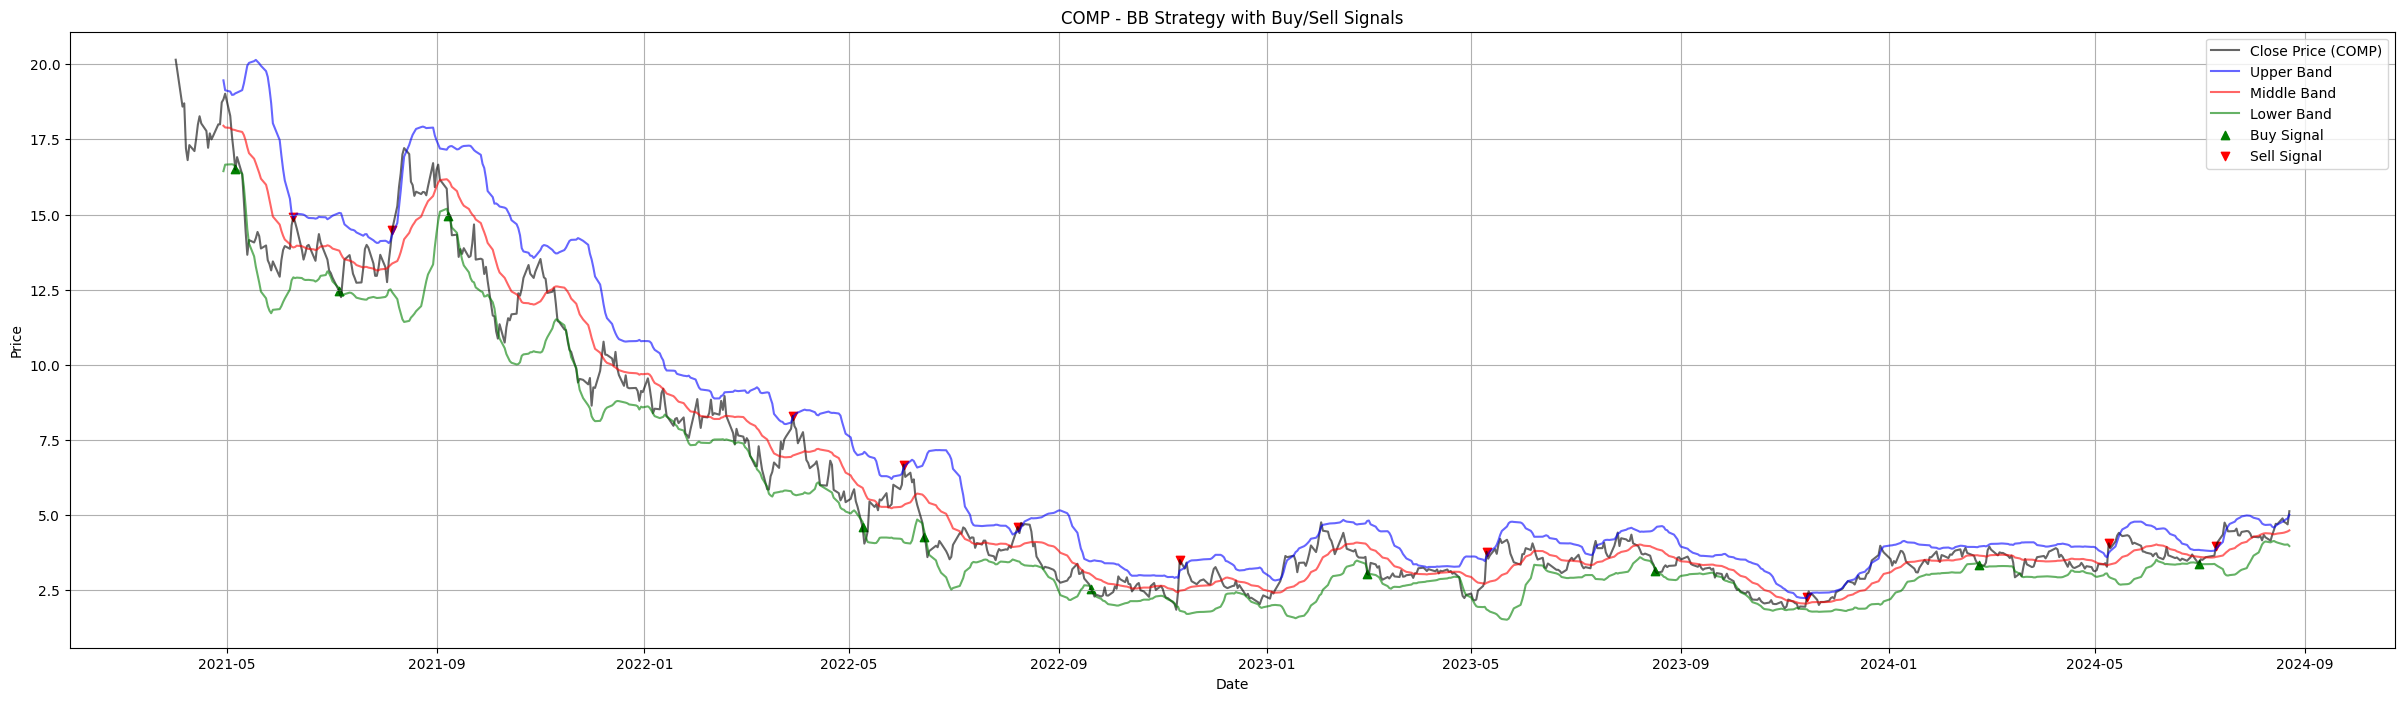

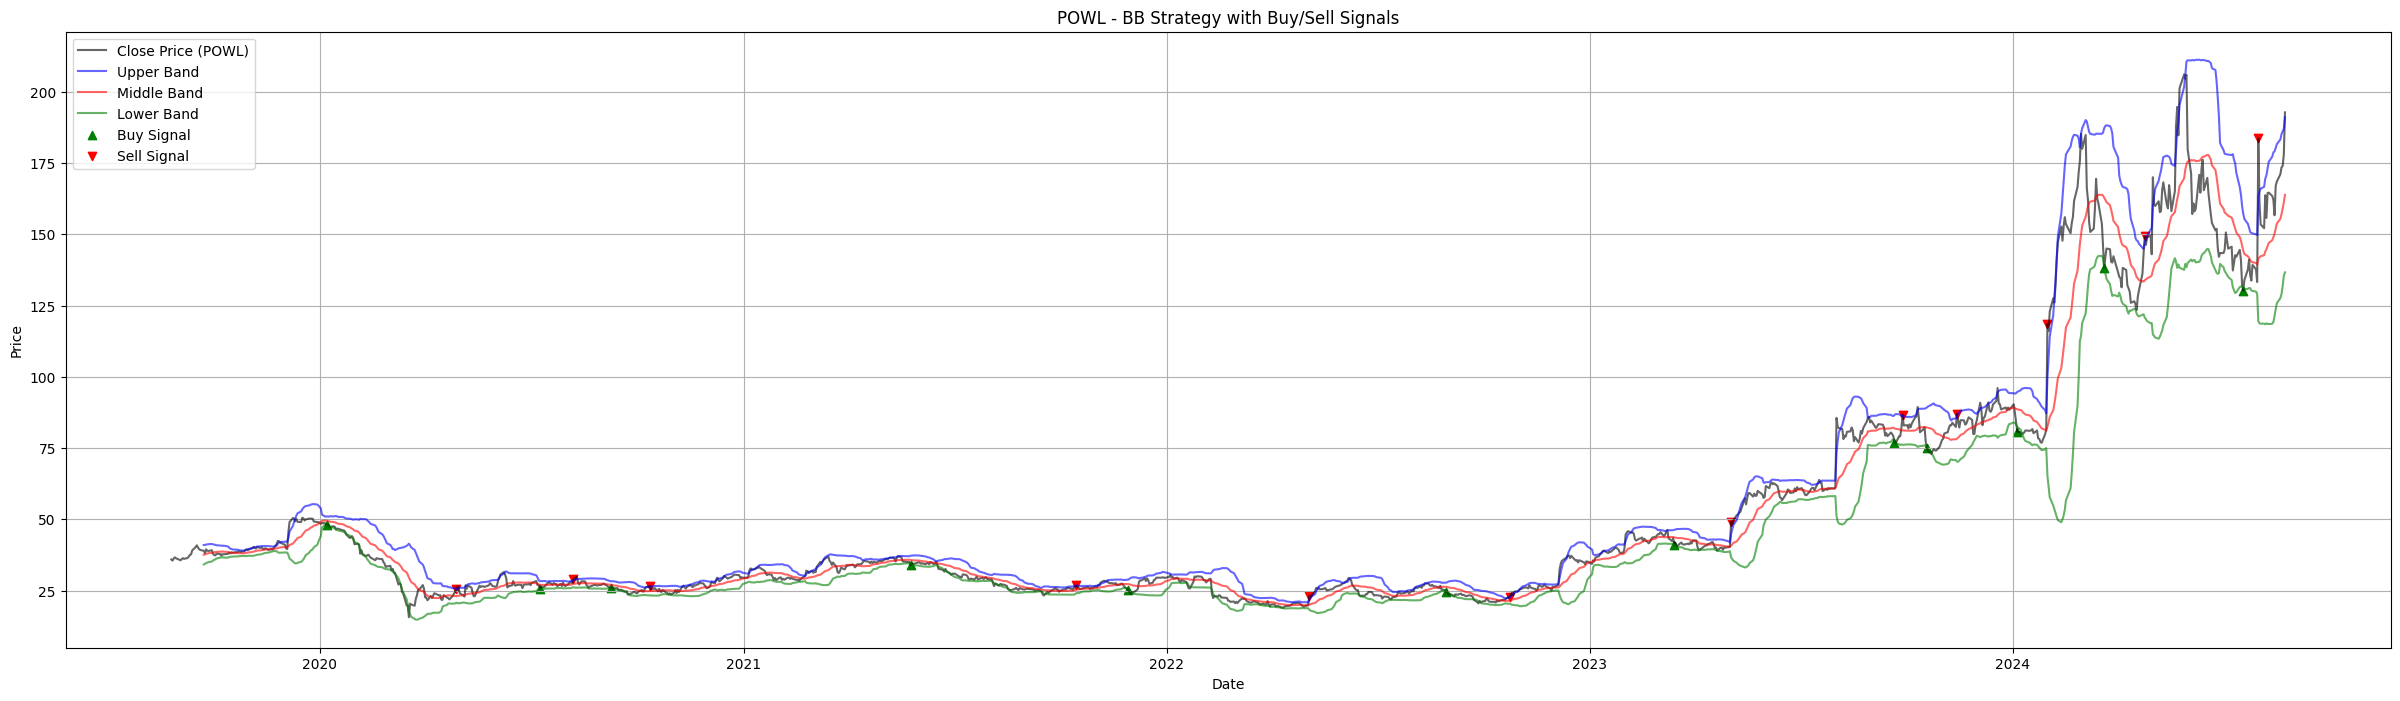

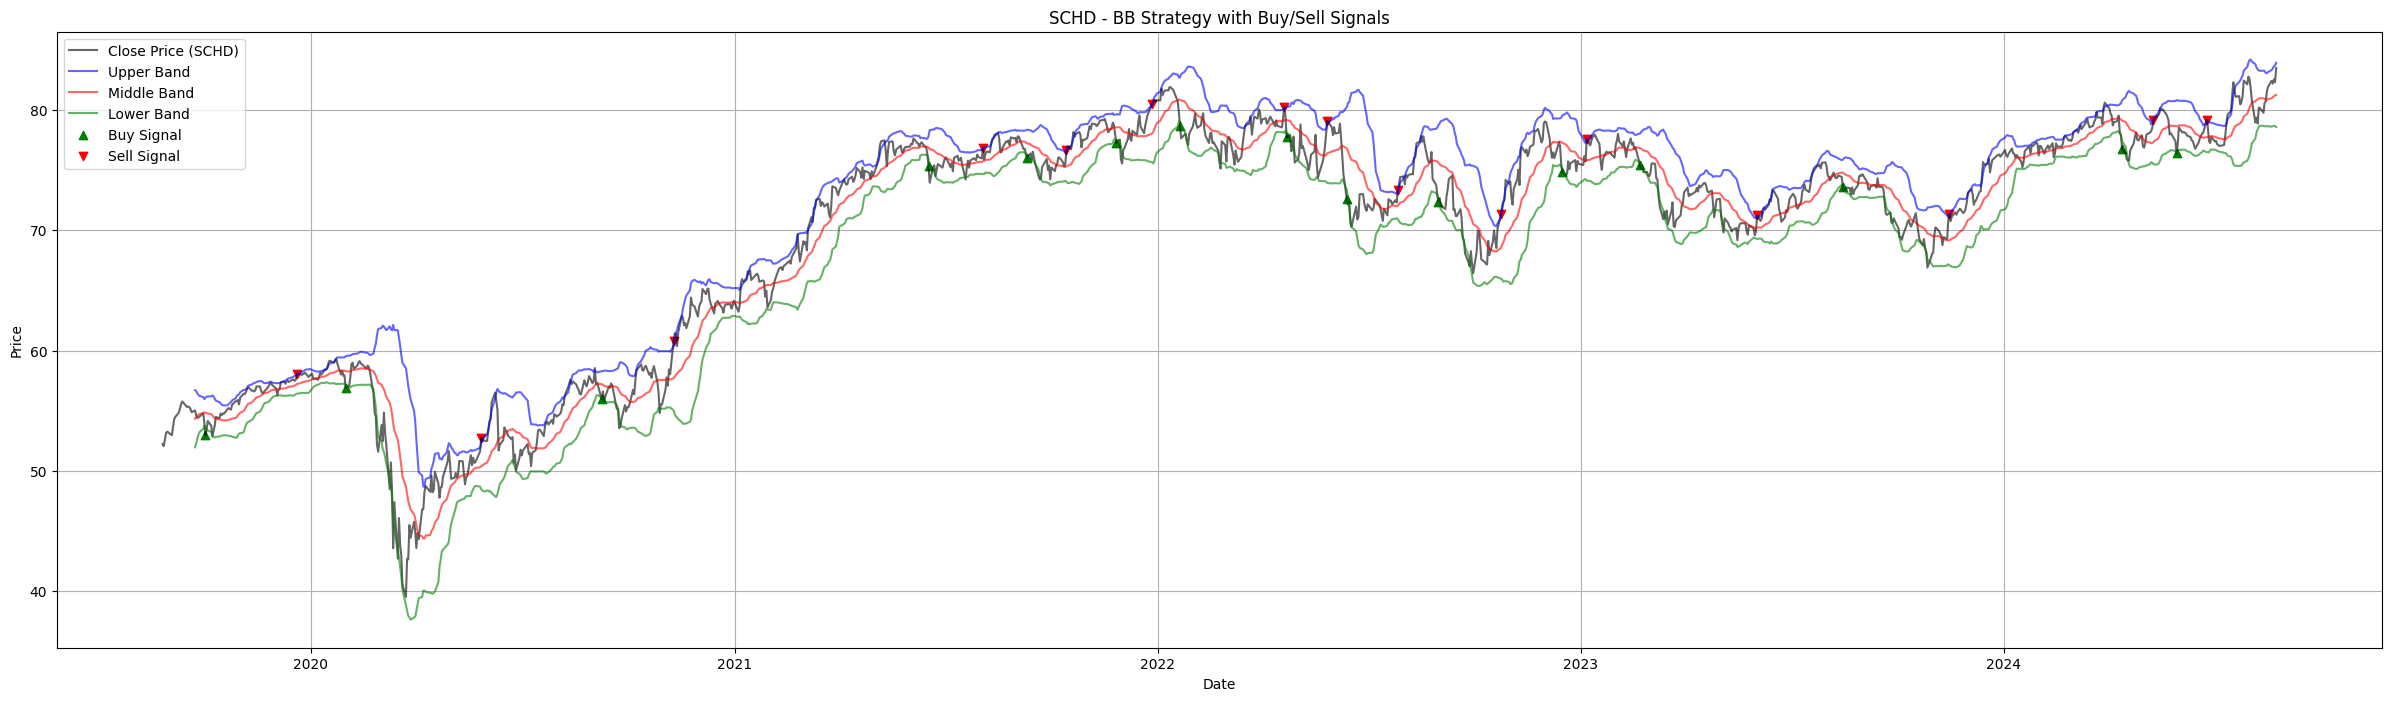

In [259]:
for ticker in ticker_list:
    plot_bb(ticker, ti, signals)

# Advanced strategy

In [260]:
def str_adv(index, row, risk, position, last_index, ti, signals):
    if row['MACD'][ticker] > row['MACD_Signal'][ticker] and row['RSI'][ticker] < 30 and row['Close'][ticker] < row['lower_band'][ticker]:
        if not position:
            signals.loc[index, ('MACD_buy', ticker)] = row['Close'][ticker]
            position = True
    elif row['MACD'][ticker] < row['MACD_Signal'][ticker] and row['RSI'][ticker] > 70 and row['Close'][ticker] > row['upper_band'][ticker]:
        if position:
            signals.loc[index, ('MACD_sell', ticker)] = row['Close'][ticker]
            position = False
            print(signals.loc[last_index, ('MACD_buy', ticker)])
    elif position == True and row['Close'][ticker] < signals.loc[last_index, ('MACD_buy', ticker)] * (1 - risk):
        signals.loc[index, ('MACD_sell', ticker)] = row['Close'][ticker]
        position = False
    elif position == True and row['Close'][ticker] < ti.loc[last_index, ('Close', ticker)] * (1 - risk):
        signals.loc[index, ('MACD_sell', ticker)] = row['Close'][ticker]
        position = False
    last_index = index
    return position, last_index

In [261]:
for ticker in ticker_list:
    risk = 0.03
    position = False
    last_index = ti.index[0]
    for index, row in ti.iterrows():
        position, last_index = str_adv(index, row, risk, position, last_index, ti, signals)
        positions.loc[index, ('MACD_positions', ticker)] = position

In [262]:
def plot_adv(ticker, ti, signals):
    plt.figure(figsize=(30, 8))

    plt.plot(ti.index, ti['Close', ticker], label=f'Close Price ({ticker})', color='black', alpha=0.6)
    plt.plot(ti.index, ti['MACD', ticker], label='MACD', color='blue', alpha=0.6)
    plt.plot(ti.index, ti['MACD_Signal', ticker], label='MACD Signals', color='red', alpha=0.6)
    plt.plot(ti.index, ti['MACD_Histogram', ticker], label='MACD Histogram', color='red', alpha=0.6)
    
    buy_signals = signals['MACD_buy', ticker].dropna()
    plt.scatter(buy_signals.index, buy_signals, label='Buy Signal', marker='^', color='green', alpha=1)

    sell_signals = signals['MACD_sell', ticker].dropna()
    plt.scatter(sell_signals.index, sell_signals, label='Sell Signal', marker='v', color='red', alpha=1)

    plt.title(f"{ticker} - MACD Strategy with RSI, Bollinger Band and risk factoring")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

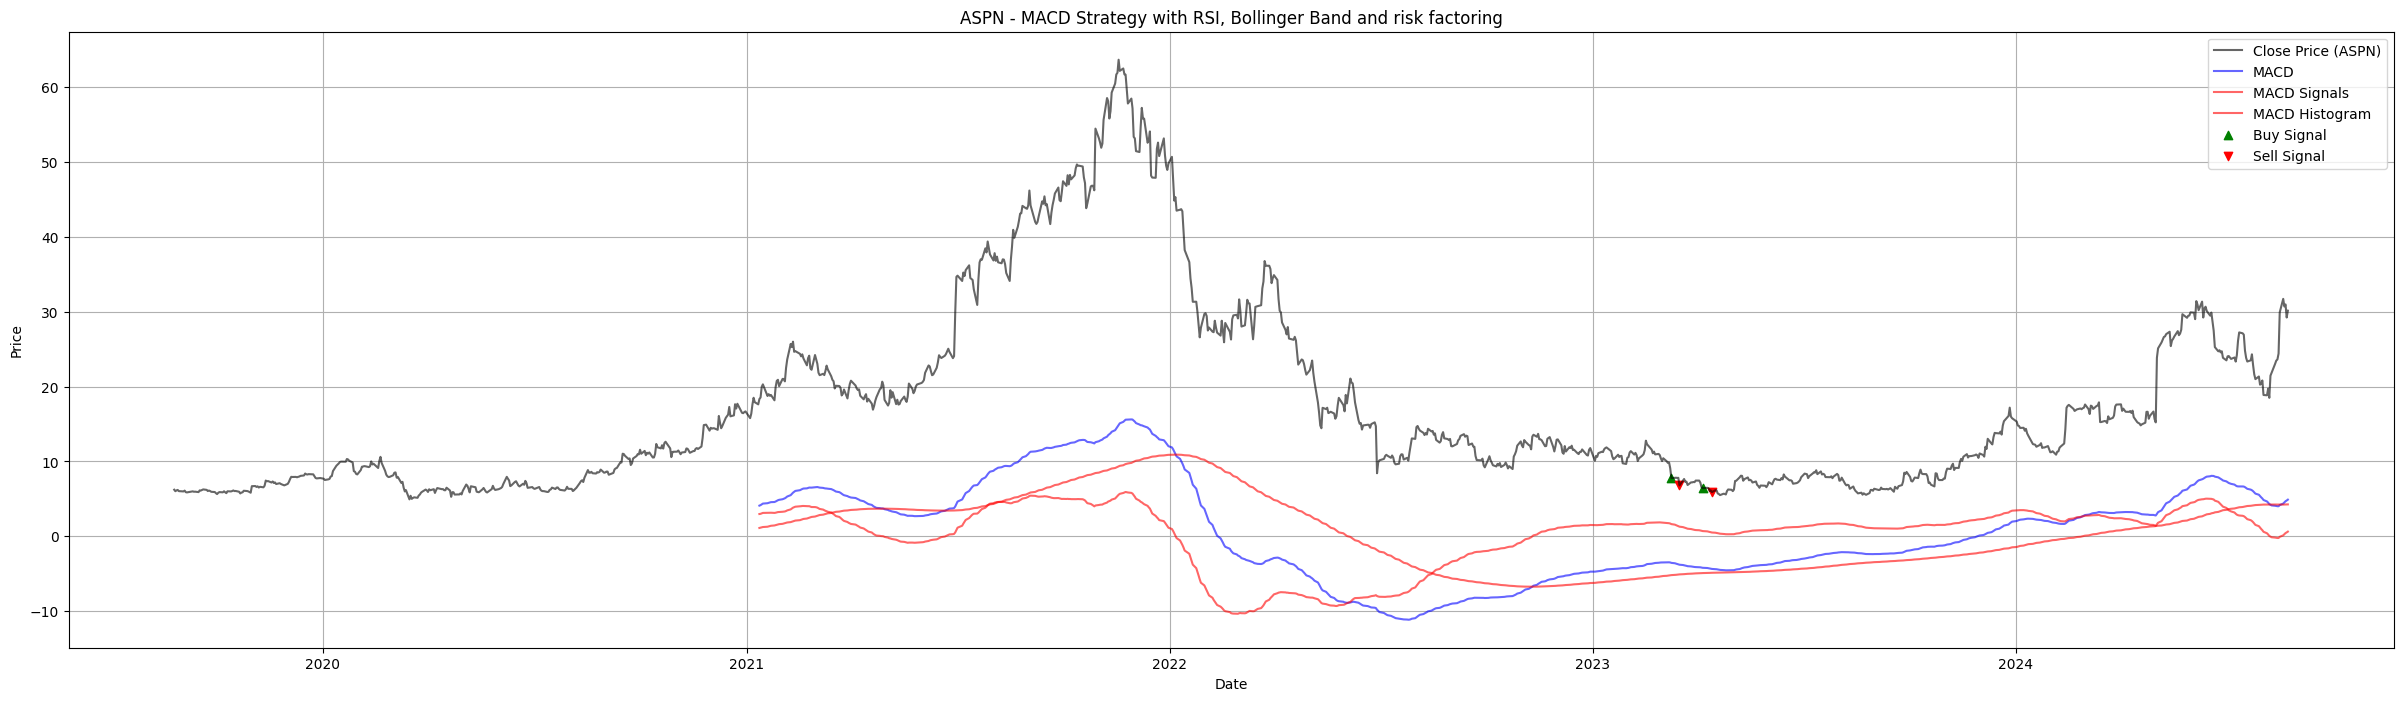

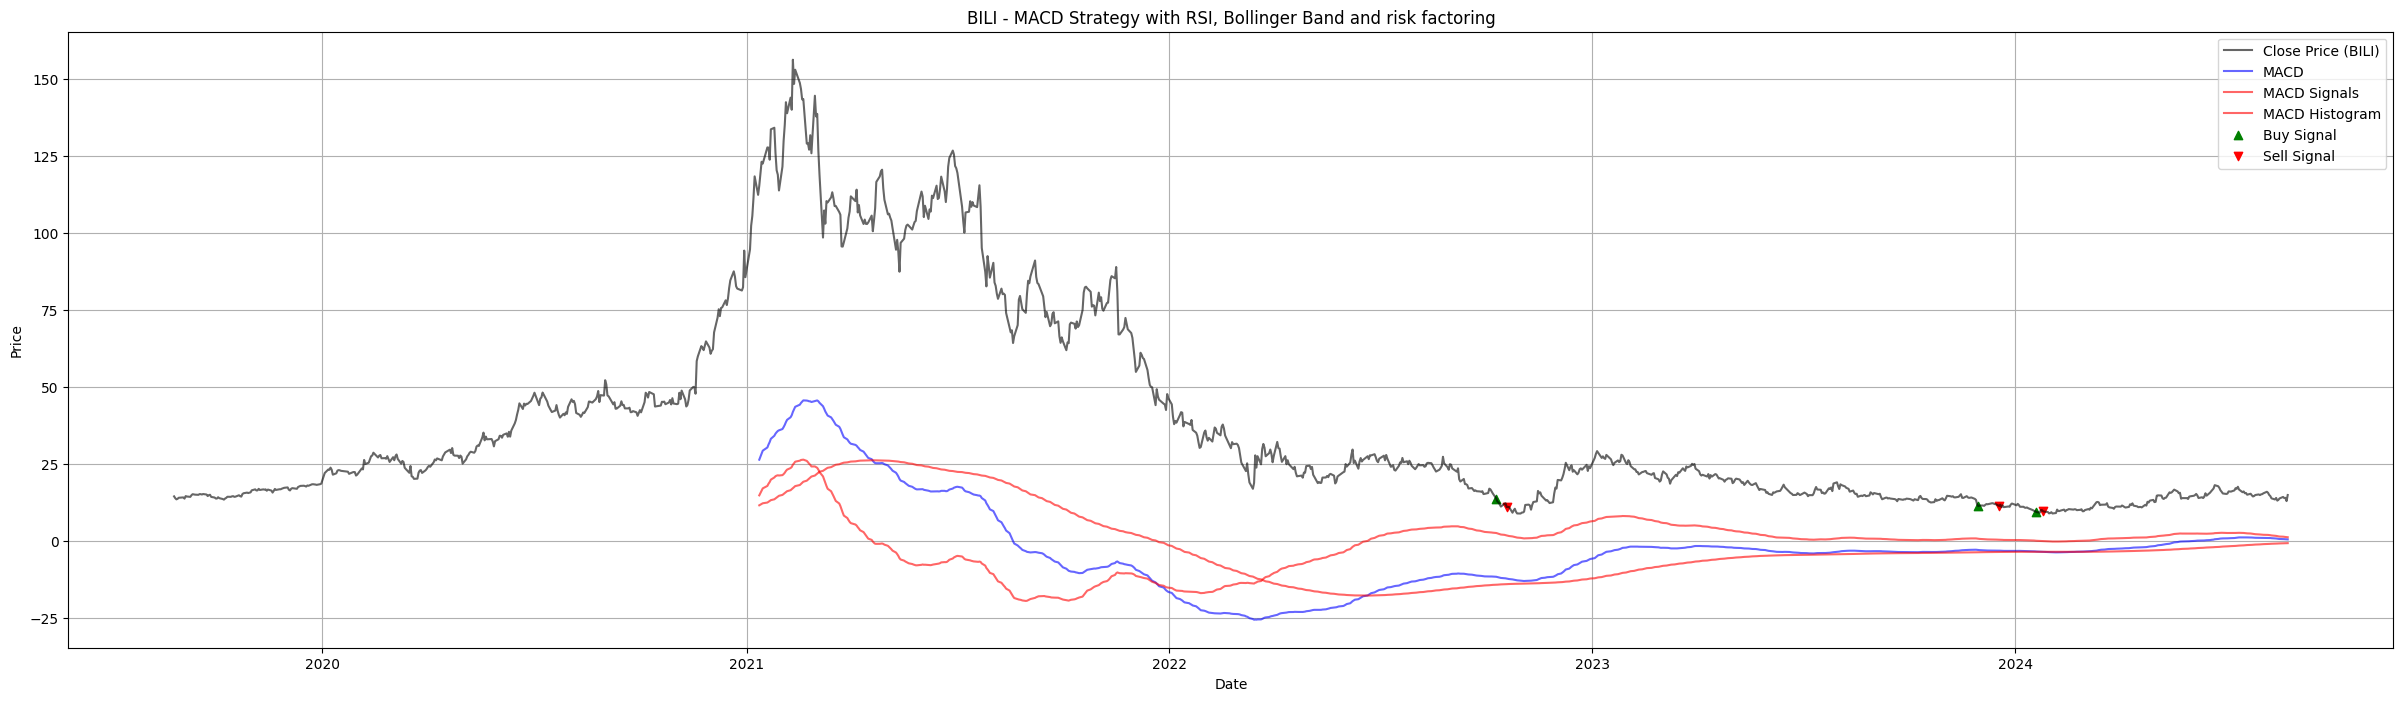

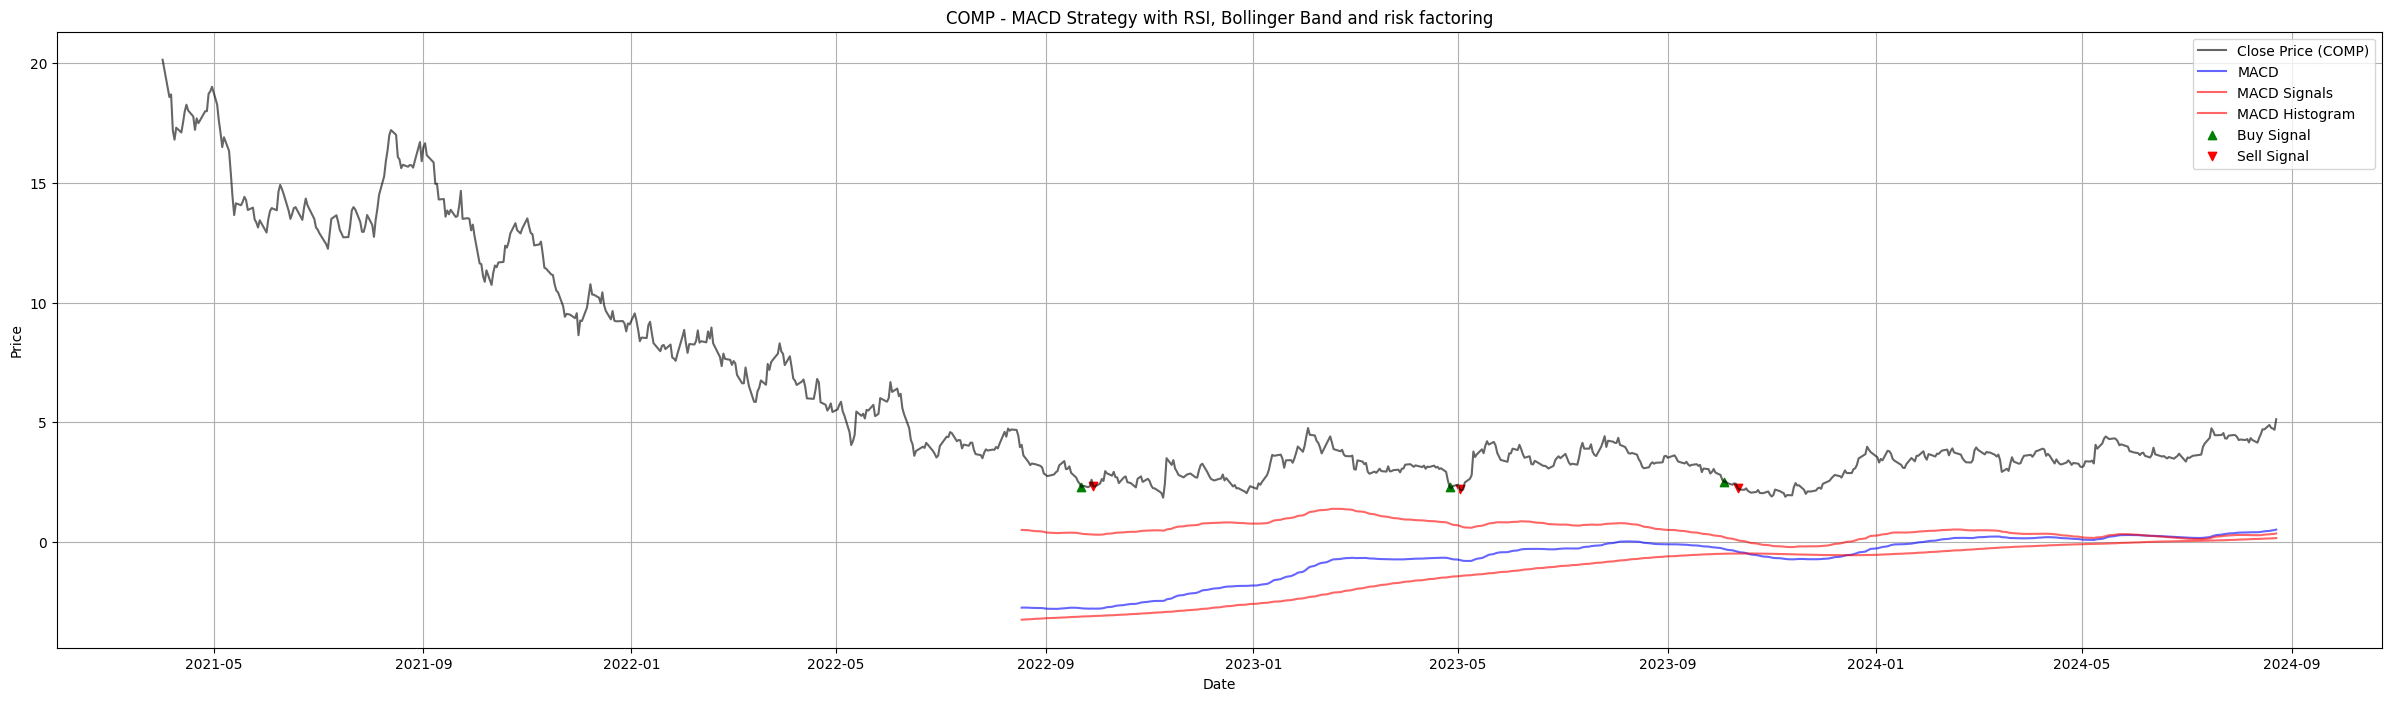

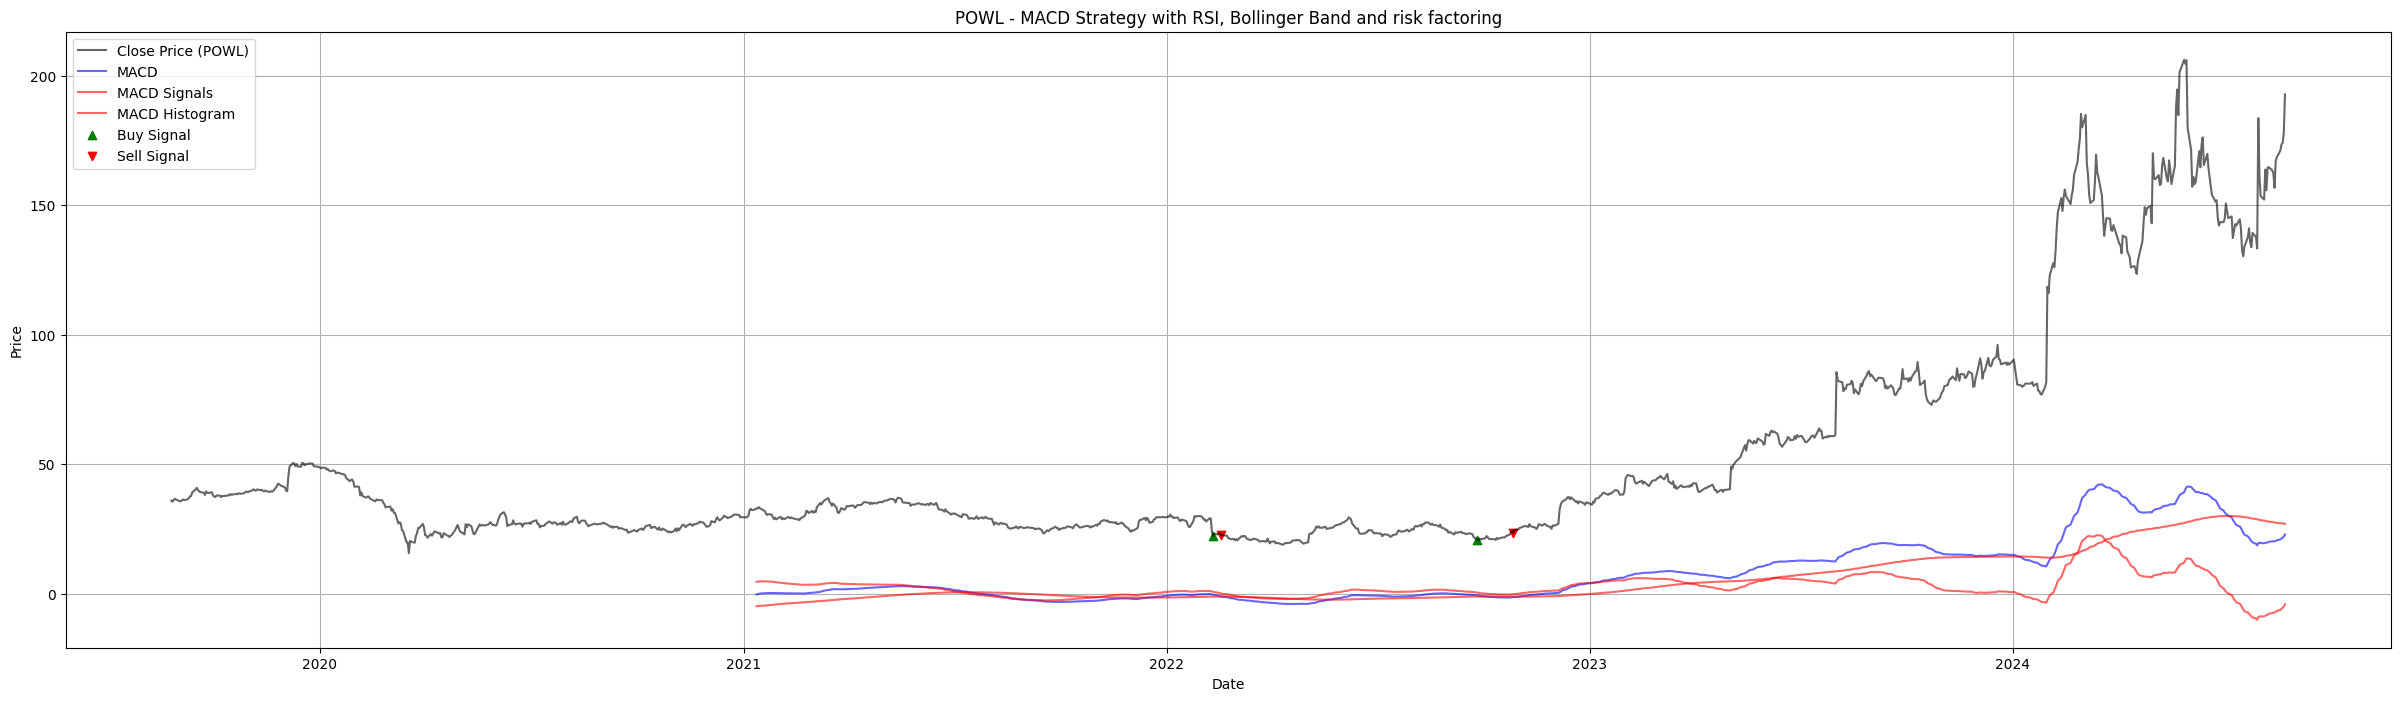

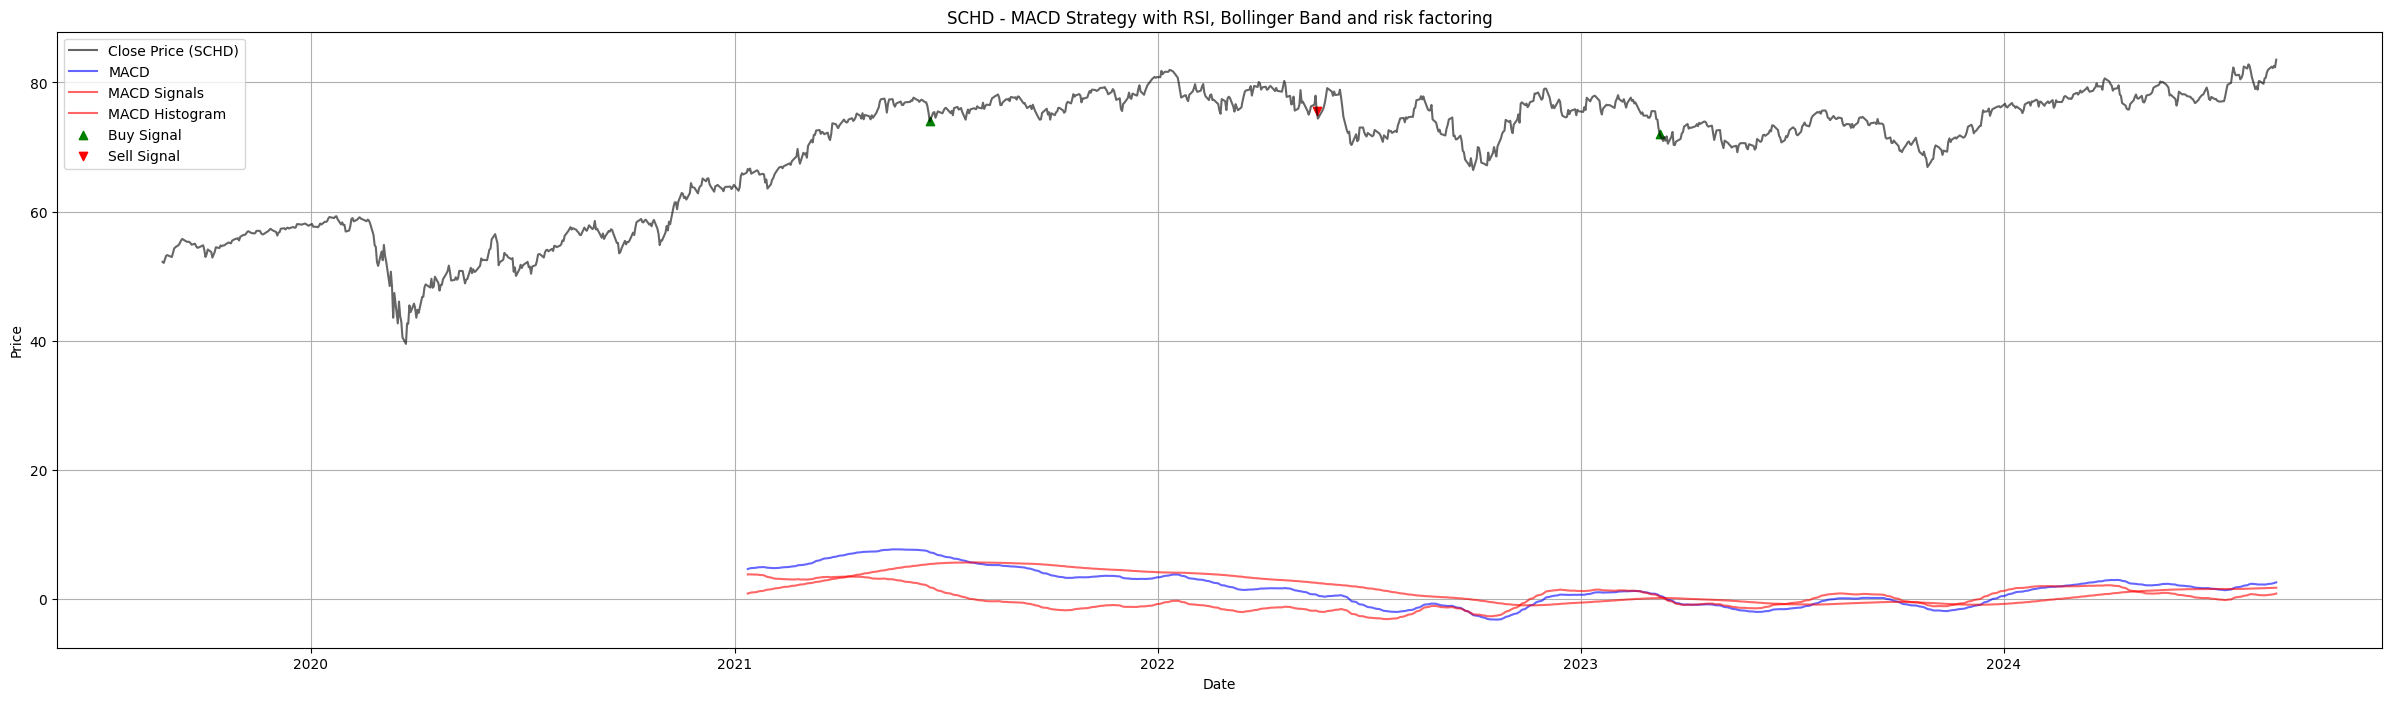

In [263]:
for ticker in ticker_list:
    plot_adv(ticker, ti, signals)

In [266]:
for strategy in ['SMA', 'RSI', 'bb' ,'MACD']:
    for ticker in ticker_list:
        last_position = False
        investment_value = 1000
        current_value = investment_value
        for index, row in positions.iterrows():
            if last_position == False and row[f'{strategy}_positions'][ticker] == True:
                last_position = True
                current_no_of_stocks = current_value/row['Open'][ticker]
            elif last_position == True and row[f'{strategy}_positions'][ticker] == False:
                last_position = False
                current_value = current_no_of_stocks*row['Close'][ticker]
        returns.loc[0, (f'{strategy}_returns', ticker)] = (current_value/investment_value - 1) *100

In [267]:
returns

SMA_returns                                             RSI_returns  \
         ASPN       BILI       COMP       POWL       SCHD        ASPN   
0  209.782615  14.512754 -58.062782 -10.484106  25.924981  -80.369515   

                                              bb_returns             \
        BILI       COMP       POWL       SCHD       ASPN       BILI   
0 -69.580717  60.942672 -10.510361  11.495187  38.015081 -65.949964   

                                 MACD_returns                                 \
        COMP      POWL      SCHD         ASPN      BILI       COMP      POWL   
0 -14.613565  1.911881  5.222482   -32.270913 -24.27755 -31.246373  1.167305   

             
       SCHD  
0  1.003076